In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 1: Load the currency data from the CSV file
currency_data = pd.read_csv('exchange_rates.csv')
currency_data['date'] = pd.to_datetime(currency_data['date'], dayfirst=True, errors='coerce')
currency_data

,Unnamed: 0,Country/Currency,currency,value,date
0,0,Australia Dollar,AUD,1.581627,2021-12-17
1,1,Great Britain Pound,GBP,0.851619,2021-12-17
2,2,Euro,EUR,1.000000,2021-12-17
3,3,Japan Yen,JPY,128.301759,2021-12-17
4,4,Switzerland Franc,CHF,1.041015,2021-12-17
...,...,...,...,...,...
134162,134162,United Arab Emirates Dirham,AED,3.966752,2024-05-30
134163,134163,Vanuatu Vatu,VUV,128.216375,2024-05-30
134164,134164,Vietnam Dong,VND,27493.376470,2024-05-30
134165,134165,Yemen Rial,YER,270.424153,2024-05-30


In [4]:
# Step 2: Fetch the price data from Abastores
base_url = "https://api.abastores.com/api/v2/marketdata/dataprice-rag/"

# Initialize a list to store the data from all pages
all_data = []

# Iterate over the 36 pages
for page_number in range(1, 38):
    # Construct the full URL for the current page
    url = f"{base_url}?page={page_number}&page_size=1000"
    
    # Send a GET request to the endpoint
    response = requests.get(url)
    
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Get the data from the response
        data = response.json()
        
        # Extract values from the "results" column and create separate columns
        df = pd.json_normalize(data['results'])
        
        # Add the current DataFrame to the list
        all_data.append(df)
    else:
        print(f"Failed to retrieve data for page {page_number}. Status code:", response.status_code)

# Concatenate all DataFrames into a single DataFrame
price_data = pd.concat(all_data, ignore_index=True)
price_data['date'] = pd.to_datetime(price_data['date'], utc=True, errors='coerce')
price_data


/var/folders/y5/7r7r6jj116l4ynh34bmr4vgr0000gn/T/ipykernel_6406/1802825220.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  price_data = pd.concat(all_data, ignore_index=True)


,id,date,price,quantity,region,product.id,product.meta_product.id,product.meta_product.name,product.meta_product.icon,product.family.id,product.family.name,product.variety.id,product.variety.name,data_source.id,data_source.name,data_source.link,data_source.kind,province.id,province.name
0,181810,2024-05-31 13:00:00+00:00,166.00,NaN,NaN,21948,4,Maíz,a-corn,1,Cereales,15708,Julio 2024,55,Bolsa de Chicago,None,INTERNATIONAL,62,Estados Unidos
1,181811,2024-05-31 13:00:00+00:00,235.00,NaN,NaN,21947,284,Trigo,a-wheat,1,Cereales,15707,Julio 2024,55,Bolsa de Chicago,None,INTERNATIONAL,62,Estados Unidos
2,181812,2024-05-31 13:00:00+00:00,262.50,NaN,NaN,21949,284,Trigo,a-wheat,1,Cereales,15709,Sept. 2024,54,Euronext,None,INTERNATIONAL,60,París
3,181813,2024-05-31 13:00:00+00:00,214.00,NaN,NaN,21938,4,Maíz,a-corn,1,Cereales,15701,Junio 24,54,Euronext,None,INTERNATIONAL,60,París
4,181818,2024-05-31 13:00:00+00:00,210.00,NaN,NaN,20461,5,Cebada,a-barley,1,Cereales,1,Común,56,Lonja Valladolid y Palencia,https://lonjavalladolidpalencia.com/,NATIONAL,11,Palencia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36941,97321,2002-01-04 00:00:00+00:00,180.30,0.0,16.0,21792,284,Trigo,a-wheat,1,Cereales,15560,Duro,36,Lonja de Toledo,https://www.fedeto.es/lonja/cereales.htm,NATIONAL,2,Toledo
36942,97322,2002-01-04 00:00:00+00:00,147.25,0.0,16.0,21886,284,Trigo,a-wheat,1,Cereales,15545,Pienso,36,Lonja de Toledo,https://www.fedeto.es/lonja/cereales.htm,NATIONAL,2,Toledo
36943,97323,2002-01-04 00:00:00+00:00,171.29,0.0,16.0,21873,284,Trigo,a-wheat,1,Cereales,15592,Fuerza +300w +14 pr,36,Lonja de Toledo,https://www.fedeto.es/lonja/cereales.htm,NATIONAL,2,Toledo
36944,97324,2002-01-04 00:00:00+00:00,153.26,0.0,16.0,21890,284,Trigo,a-wheat,1,Cereales,15609,Panificable,36,Lonja de Toledo,https://www.fedeto.es/lonja/cereales.htm,NATIONAL,2,Toledo


In [5]:
# Assuming both datasets have a 'date' column for merging
price_data['date'] = pd.to_datetime(price_data['date'])
currency_data['date'] = pd.to_datetime(currency_data['date'])
# Ensure both 'date' columns are timezone-naive
price_data['date'] = price_data['date'].dt.tz_localize(None)
currency_data['date'] = currency_data['date'].dt.tz_localize(None)

In [6]:
# Drop rows with NaN dates
currency_data = currency_data.dropna(subset=['date'])
price_data = price_data.dropna(subset=['date'])

In [7]:
# Aggregate currency data by date and currency to get average values
aggregated_currency_data = currency_data.groupby(['date', 'currency'])['value'].mean().reset_index()

# Pivot the aggregated currency data to have currencies as columns
pivot_currency_data = aggregated_currency_data.pivot(index='date', columns='currency', values='value').reset_index()

# Inspect the pivoted data
print(pivot_currency_data.head())

currency       date       AED         AFN         ALL         AMD       ANG  \
0        2021-12-17  4.159826  115.810550  120.855126  557.922979  2.041220   
1        2021-12-18  4.127870  115.710400  120.749546  557.435576  2.039455   
2        2021-12-19  4.127870  115.710400  120.749546  557.435576  2.039455   
3        2021-12-20  4.130046  115.791262  120.836080  557.835056  2.040916   
4        2021-12-21  4.144655  115.205690  120.848019  555.298905  2.031689   

currency         AOA         ARS       AUD       AWG  ...           VND  \
0         637.752325  115.479548  1.581627  2.038586  ...  26028.778038   
1         638.337406  115.278973  1.577277  2.023419  ...  25827.954997   
2         638.337406  115.278973  1.577277  2.023419  ...  25827.954997   
3         638.675520  115.297976  1.579708  2.024491  ...  25841.635331   
4         638.882903  115.244211  1.586287  2.031087  ...  25828.655251   

currency         VUV       WST         XAF       XCD         XOF         X

In [8]:
# Aggregate price data by date, product name, and region to get daily average prices
aggregated_price_data = price_data.groupby(['date', 'product.meta_product.name', 'province.name'])['price'].mean().reset_index()

# Inspect the aggregated data
aggregated_price_data


,date,product.meta_product.name,province.name,price
0,2002-01-04 00:00:00,Avena,Toledo,150.250
1,2002-01-04 00:00:00,Cebada,Toledo,138.985
2,2002-01-04 00:00:00,Maíz,Toledo,141.240
3,2002-01-04 00:00:00,Trigo,Toledo,164.678
4,2002-01-11 00:00:00,Avena,Toledo,153.250
...,...,...,...,...
18298,2024-05-31 13:00:00,Pipa,Valladolid,375.000
18299,2024-05-31 13:00:00,Trigo,Estados Unidos,235.000
18300,2024-05-31 13:00:00,Trigo,Palencia,222.000
18301,2024-05-31 13:00:00,Trigo,París,262.500


In [9]:
# Merge the aggregated price data with the pivoted currency data
merged_data = pd.merge(aggregated_price_data, pivot_currency_data, on='date', how='inner')

# Inspect the merged data
merged_data


,date,product.meta_product.name,province.name,price,AED,AFN,ALL,AMD,ANG,AOA,...,VND,VUV,WST,XAF,XCD,XOF,XPF,YER,ZAR,ZMK
0,2021-12-20,Avena,Sevilla,254.54,4.130046,115.791262,120.836080,557.835056,2.040916,638.675520,...,25841.635331,127.341837,2.923645,656.315910,3.038761,656.30131,119.692469,281.381656,17.924248,10120.993621
1,2021-12-20,Cebada,Sevilla,253.10,4.130046,115.791262,120.836080,557.835056,2.040916,638.675520,...,25841.635331,127.341837,2.923645,656.315910,3.038761,656.30131,119.692469,281.381656,17.924248,10120.993621
2,2021-12-20,Maíz,Sevilla,272.67,4.130046,115.791262,120.836080,557.835056,2.040916,638.675520,...,25841.635331,127.341837,2.923645,656.315910,3.038761,656.30131,119.692469,281.381656,17.924248,10120.993621
3,2021-12-20,Trigo,Sevilla,398.25,4.130046,115.791262,120.836080,557.835056,2.040916,638.675520,...,25841.635331,127.341837,2.923645,656.315910,3.038761,656.30131,119.692469,281.381656,17.924248,10120.993621
4,2021-12-20,Triticale,Sevilla,266.00,4.130046,115.791262,120.836080,557.835056,2.040916,638.675520,...,25841.635331,127.341837,2.923645,656.315910,3.038761,656.30131,119.692469,281.381656,17.924248,10120.993621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2022-10-19,Cebada,Palencia,346.00,3.622337,86.302814,117.034748,398.376598,1.776398,441.707664,...,24102.207561,123.420157,2.805616,658.446562,2.665197,663.22136,119.944011,246.790953,17.821309,8876.794001
497,2022-10-19,Cebada,Valladolid,346.75,3.622337,86.302814,117.034748,398.376598,1.776398,441.707664,...,24102.207561,123.420157,2.805616,658.446562,2.665197,663.22136,119.944011,246.790953,17.821309,8876.794001
498,2022-10-19,Maíz,León,348.75,3.622337,86.302814,117.034748,398.376598,1.776398,441.707664,...,24102.207561,123.420157,2.805616,658.446562,2.665197,663.22136,119.944011,246.790953,17.821309,8876.794001
499,2022-10-19,Trigo,Burgos,368.00,3.622337,86.302814,117.034748,398.376598,1.776398,441.707664,...,24102.207561,123.420157,2.805616,658.446562,2.665197,663.22136,119.944011,246.790953,17.821309,8876.794001


In [10]:
# Check for missing values and outliers
print(merged_data.isnull().sum())
print(merged_data.describe())



date                         0
product.meta_product.name    0
province.name                0
price                        0
AED                          0
                            ..
XOF                          0
XPF                          0
YER                          0
ZAR                          0
ZMK                          0
Length: 154, dtype: int64
                                date       price         AED         AFN  \
count                            501  501.000000  501.000000  501.000000   
mean   2022-06-03 15:19:45.628742400  326.722196    3.868596   95.737638   
min              2021-12-20 00:00:00  240.140000    3.524133   82.975448   
25%              2022-03-09 00:00:00  284.000000    3.679881   88.396858   
50%              2022-06-08 00:00:00  333.000000    3.867441   92.493235   
75%              2022-09-05 00:00:00  349.250000    4.056612   98.321599   
max              2022-10-19 00:00:00  461.570000    4.206648  119.902923   
std                      

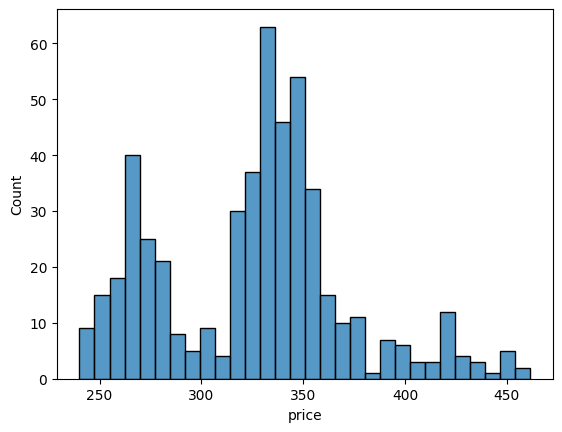

In [11]:
# Plot distributions and relationships
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of prices
sns.histplot(merged_data['price'], bins=30)
plt.show()

This histogram shows the distribution of prices across the dataset. The prices are spread out with peaks around 250-350 and some higher values.
The distribution indicates multiple modes, suggesting that different products or regions might have different pricing patterns.

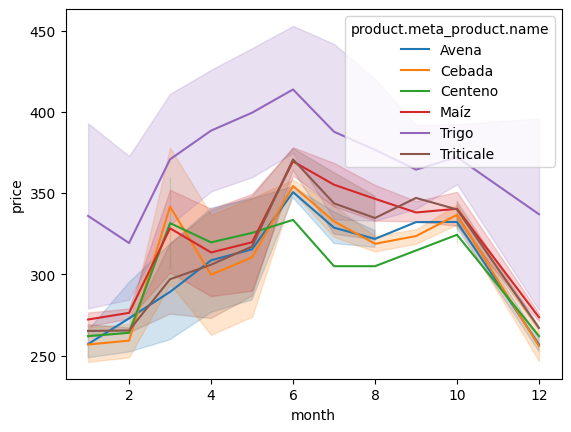

In [12]:
# Add a month and year column to control for seasonal and temporal effects
merged_data['month'] = merged_data['date'].dt.month
merged_data['year'] = merged_data['date'].dt.year

# Group by month and year to analyze seasonal trends
seasonal_trends = merged_data.groupby(['year', 'month', 'product.meta_product.name', 'province.name']).mean().reset_index()

# Plot seasonal trends
sns.lineplot(data=seasonal_trends, x='month', y='price', hue='product.meta_product.name')
plt.show()


- The line plot with shaded regions indicates the price trends over months for different product types.
- It shows clear seasonal trends where prices for all products peak around mid-year and decline towards the end.
- The variability in prices (shaded areas) also differs across products, with some products showing more price stability than others.

#### Analyzing Product, Product & Region, Region correlation with Price

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_correlations(data, groupby_columns, min_data_points=5):
    correlations = {}
    
    # Group data by specified columns
    grouped_data = data.groupby(groupby_columns)
    
    for group_name, group_data in grouped_data:
        if group_data.shape[0] < min_data_points:
            print(f"Skipping group {group_name} due to insufficient data points ({group_data.shape[0]})")
            continue
        
        subset = group_data.drop(columns=groupby_columns + ['date']).copy()
        subset = subset.select_dtypes(include=[np.number]).dropna()  # Keep only numeric columns and drop rows with NaN values
        print(f"Group: {group_name}, Data Points: {subset.shape[0]}")
        
        if 'price' in subset.columns and subset.shape[0] > 1:  # Ensure 'price' column exists and more than one row
            price_correlations = subset.corr()['price'].drop('price', errors='ignore')
            if not price_correlations.empty and not price_correlations.isna().all():
                correlations[group_name] = price_correlations
    
    return correlations

def evaluate_correlations(correlations):
    mac_list = []
    significant_count_list = []
    max_abs_corr_list = []
    
    for key, corr in correlations.items():
        if corr is not None and not corr.empty:
            abs_corr = corr.abs().dropna()
            if not abs_corr.empty:
                mac = abs_corr.mean()
                significant_count = (abs_corr >= 0.5).sum()
                max_abs_corr = abs_corr.max()
                
                mac_list.append(mac)
                significant_count_list.append(significant_count)
                max_abs_corr_list.append(max_abs_corr)
    
    evaluation = {
        'Mean Absolute Correlation': np.mean(mac_list) if mac_list else np.nan,
        'Number of Significant Correlations': np.sum(significant_count_list),
        'Maximum Absolute Correlation': np.max(max_abs_corr_list) if max_abs_corr_list else np.nan
    }
    
    return evaluation

# Define the different groupings
groupings = {
    'By Product': ['product.meta_product.name'],
    'By Product and Province': ['product.meta_product.name', 'province.name'],
    'By Province': ['province.name']
}

# Calculate and evaluate correlations for each grouping
results = {}
correlations_results = {}
for name, groupby_columns in groupings.items():
    print(f"\nCalculating correlations for: {name}")
    correlations = calculate_correlations(merged_data, groupby_columns, min_data_points=5)
    evaluation = evaluate_correlations(correlations)
    results[name] = evaluation
    correlations_results[name] = correlations

# Print the evaluations
for name, evaluation in results.items():
    print('=====================================================')
    print(f"Evaluation {name}: {evaluation}")


Calculating correlations for: By Product
Group: ('Avena',), Data Points: 81
Group: ('Cebada',), Data Points: 105
Group: ('Centeno',), Data Points: 38
Group: ('Maíz',), Data Points: 92
Group: ('Trigo',), Data Points: 105
Group: ('Triticale',), Data Points: 75

Calculating correlations for: By Product and Province
Group: ('Avena', 'León'), Data Points: 34
Skipping group ('Avena', 'Navarra') due to insufficient data points (1)
Skipping group ('Avena', 'Salamanca') due to insufficient data points (3)
Skipping group ('Avena', 'Segovia') due to insufficient data points (2)
Group: ('Avena', 'Sevilla'), Data Points: 38
Skipping group ('Avena', 'Toledo') due to insufficient data points (1)
Skipping group ('Avena', 'Zamora') due to insufficient data points (2)
Skipping group ('Cebada', 'Albacete') due to insufficient data points (2)
Skipping group ('Cebada', 'Burgos') due to insufficient data points (1)
Skipping group ('Cebada', 'Cuenca') due to insufficient data points (2)
Group: ('Cebada', 'L

#### Correlation Calculations by Group:

**By Product:**

- Data Points: The number of data points per product group ranges from 38 to 105.
- Results: This grouping resulted in a mean absolute correlation of 0.4529, with 489 significant correlations and a maximum absolute correlation of 0.8301.

**By Product and Province:**

- Data Points: Many groups had insufficient data points (< 5) and were skipped, while others had sufficient data points (e.g., 34, 38, 39).
- Results: This grouping resulted in a higher mean absolute correlation of 0.5214, with 1300 significant correlations and a maximum absolute correlation of 0.9860.

**By Province:**

- Data Points: Groups with insufficient data points were skipped, and the remaining groups had data points ranging from 5 to 213.
- Results: This grouping resulted in a mean absolute correlation of 0.2103, with 97 significant correlations and a maximum absolute correlation of 0.8079.

#### Analysis

**High Correlations in By Product and Province:**

The higher mean absolute correlations and the maximum absolute correlations observed in the "By Product and Province" grouping suggest that this level of granularity captures stronger relationships between variables.
However, it is also essential to be cautious about high correlation values, especially when they approach 1.0, as this could indicate overfitting or data peculiarities.

**Handling Low Data Points:**

The filtering of groups with insufficient data points (< 5) is a crucial step to ensure that the correlations calculated are reliable and not driven by outliers or noise.
Despite this, the high correlation values in the "By Product and Province" grouping should be further investigated to ensure they are meaningful.

#### Conclusion

The evaluation of correlations at different aggregation levels provides the following insights:

- **By Product and Province:** This grouping offers the highest mean absolute correlations and a larger number of significant correlations, indicating strong relationships between product prices and other variables when analyzed at this granular level.
- **By Product:** This grouping shows moderate correlations, suggesting that some relationships are captured, but not as strongly as in the "By Product and Province" grouping.
- **By Province:** This grouping shows the lowest mean absolute correlations, indicating weaker relationships when data is aggregated only by province.

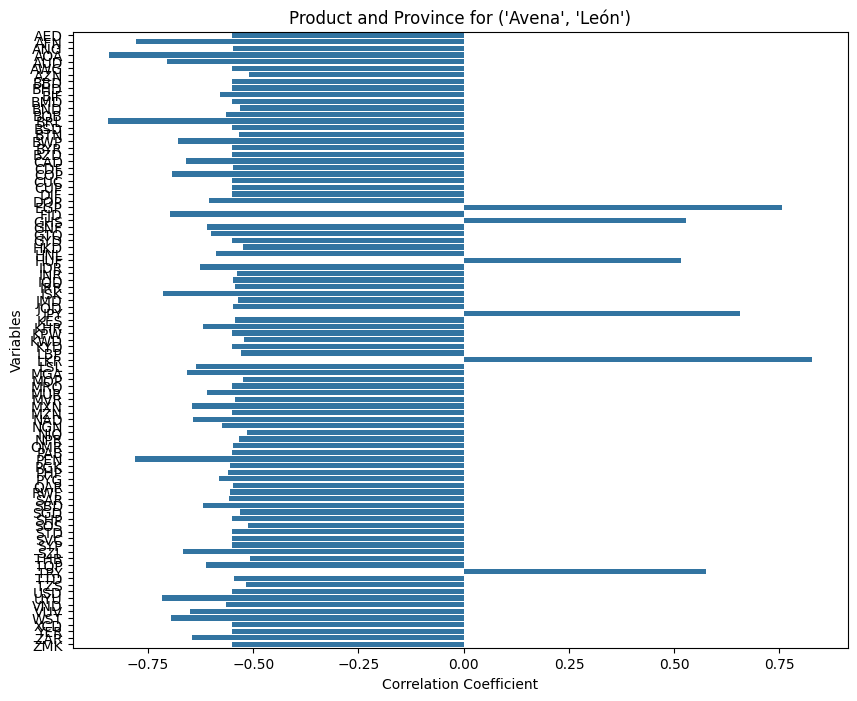

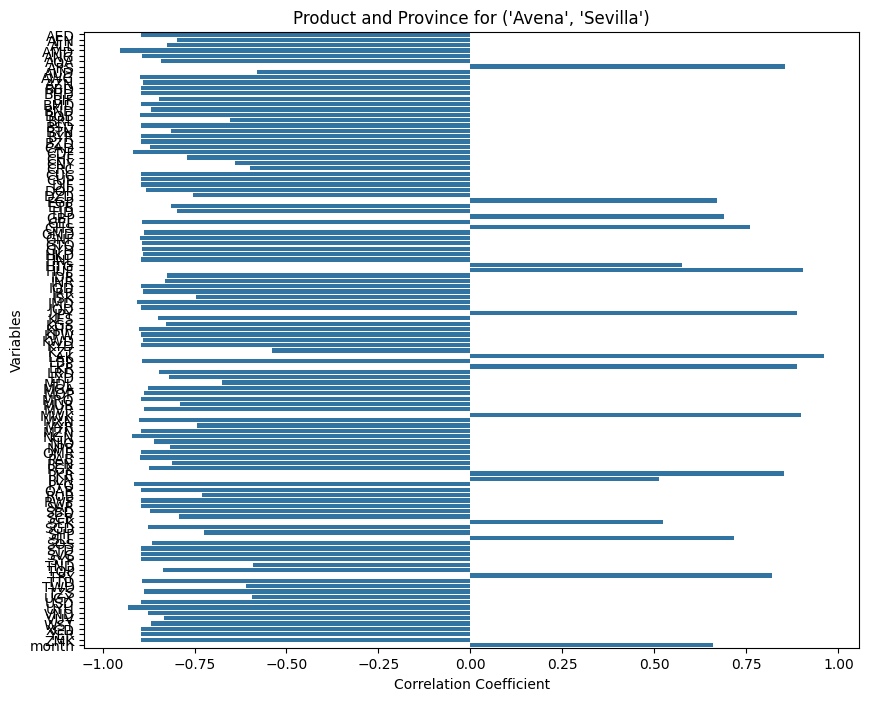

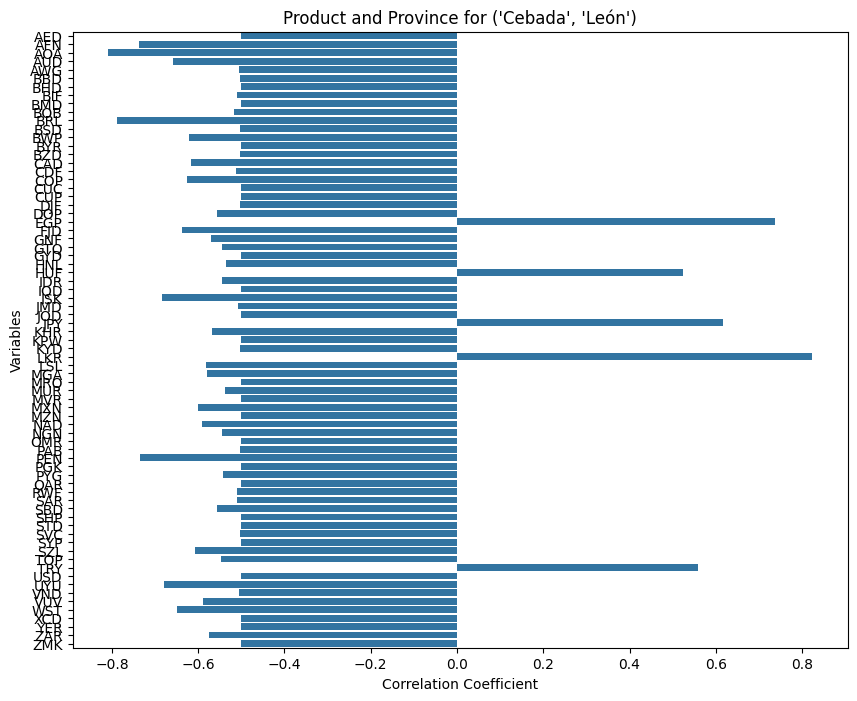

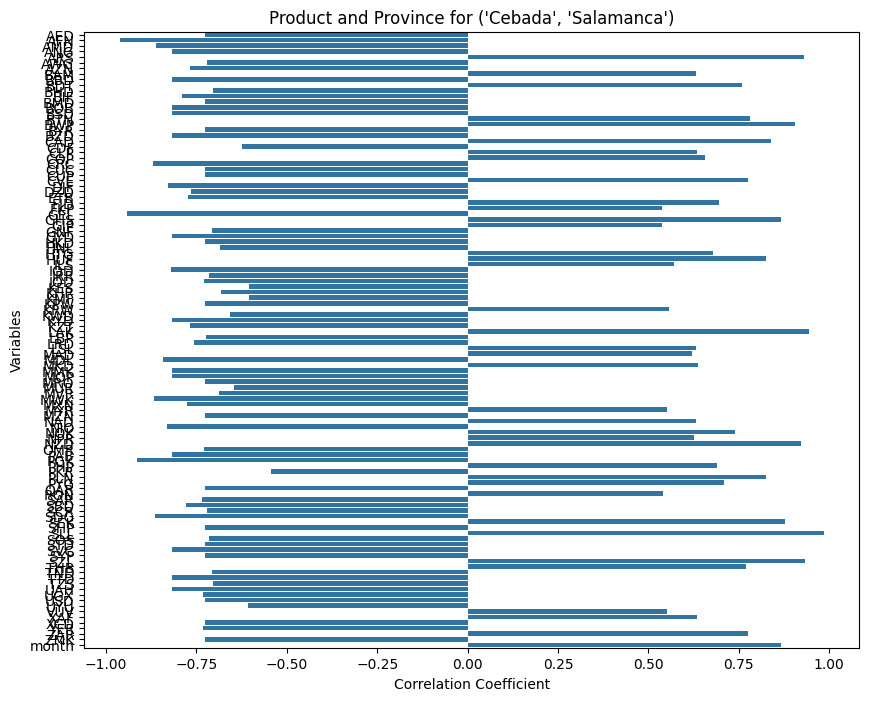

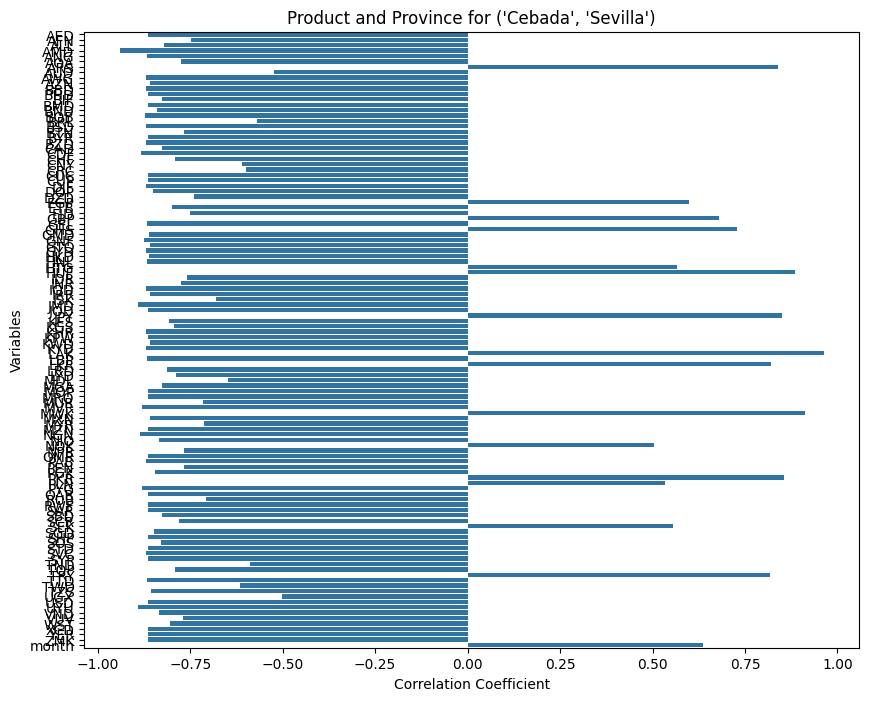

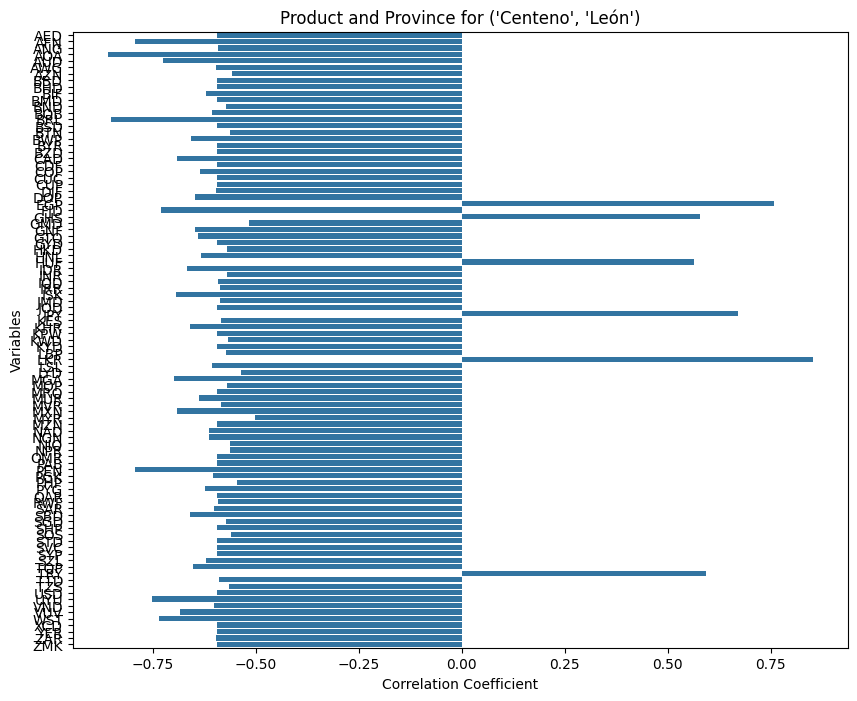

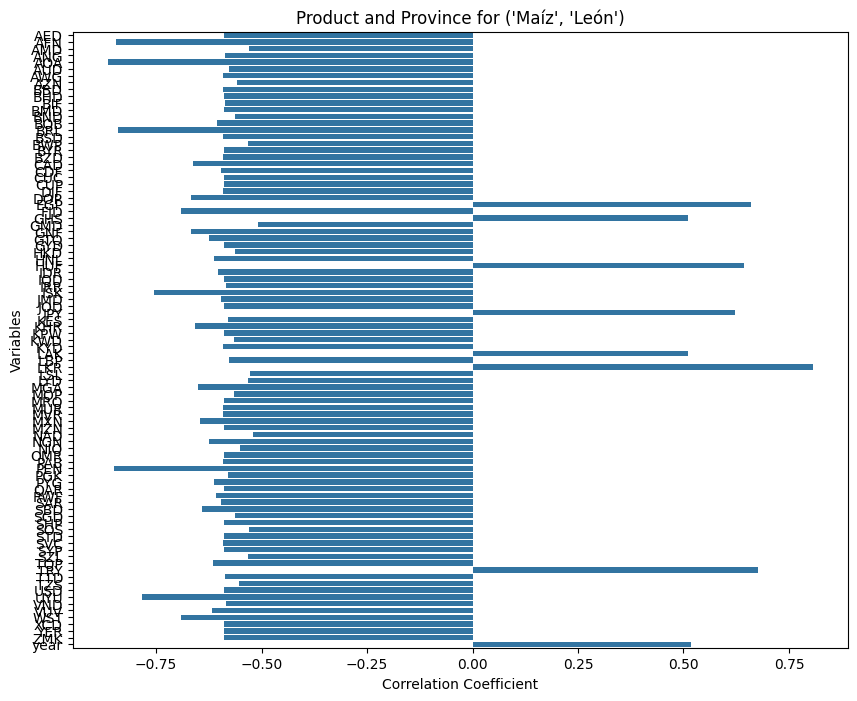

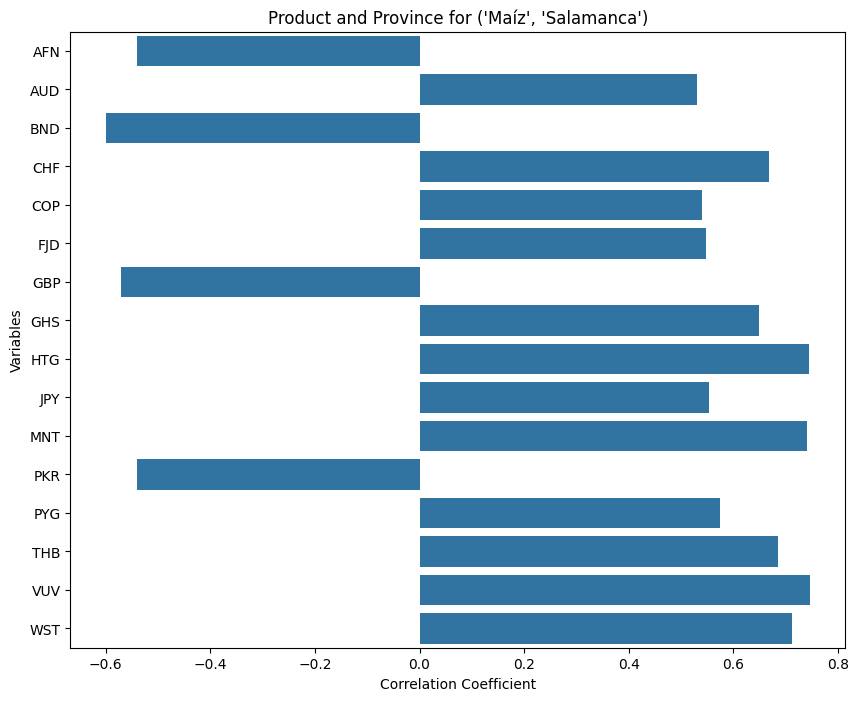

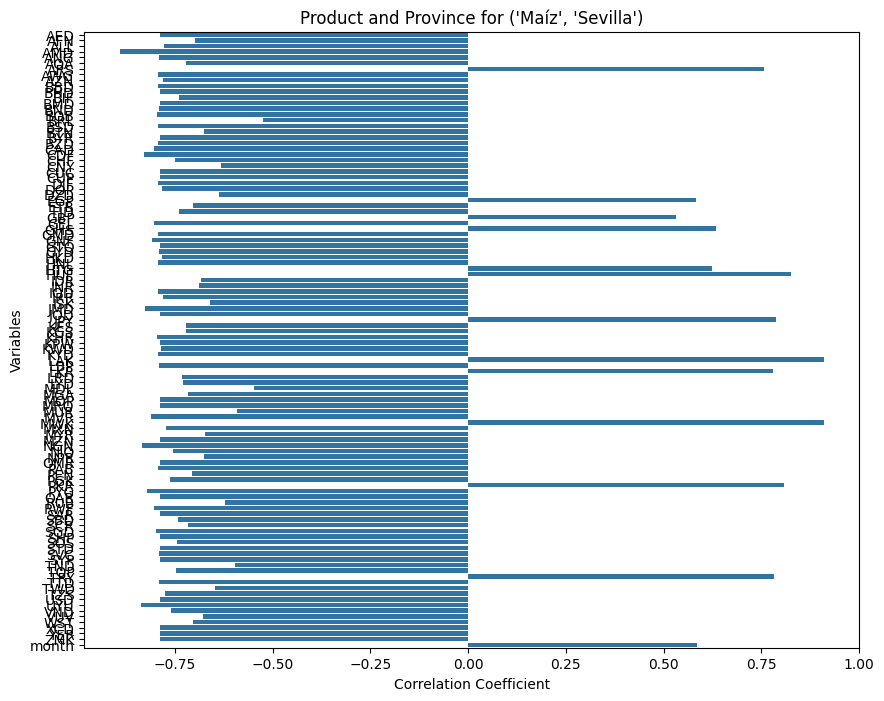

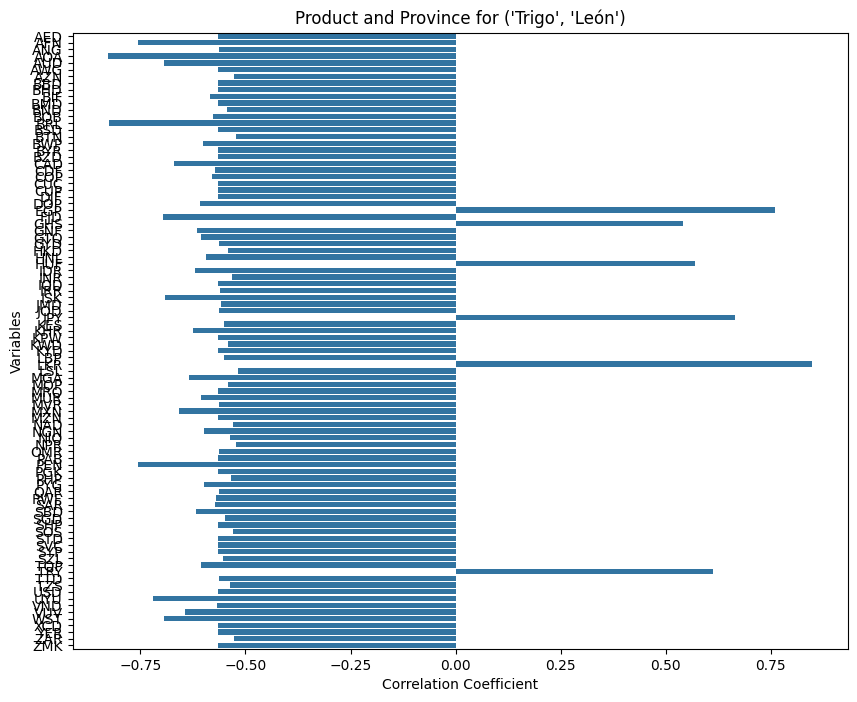

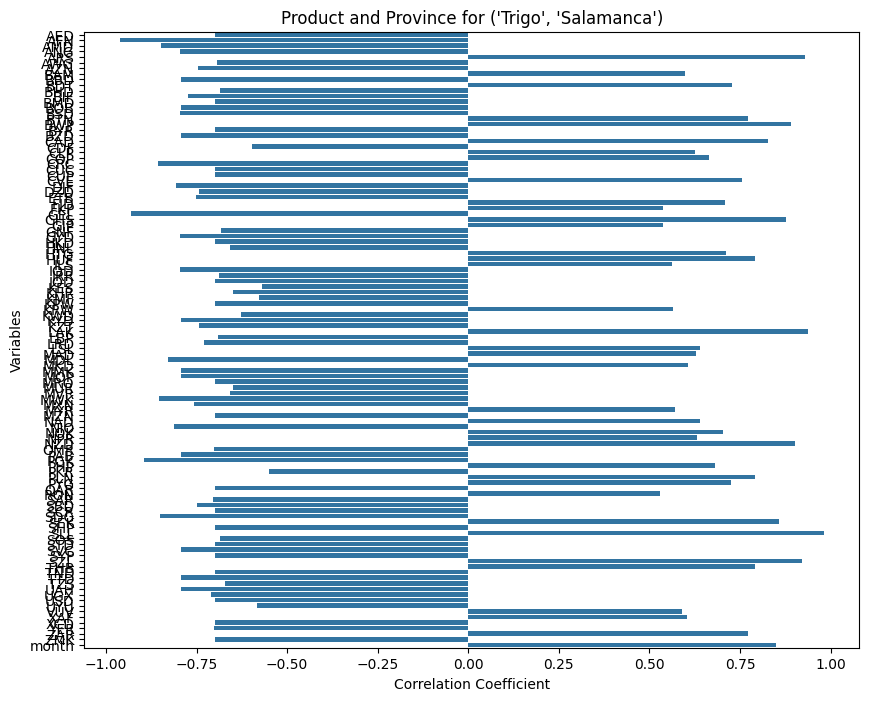

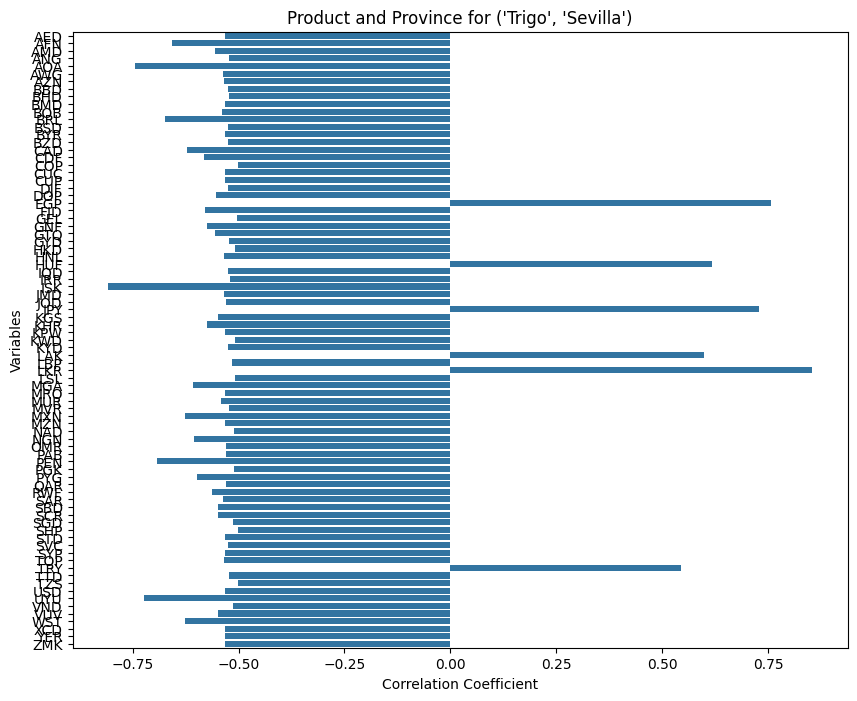

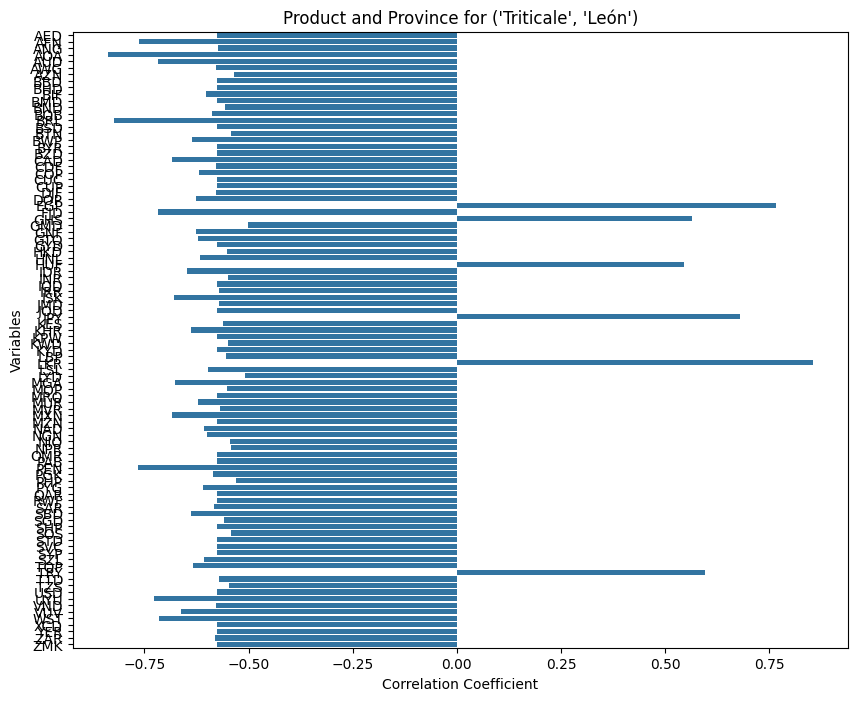

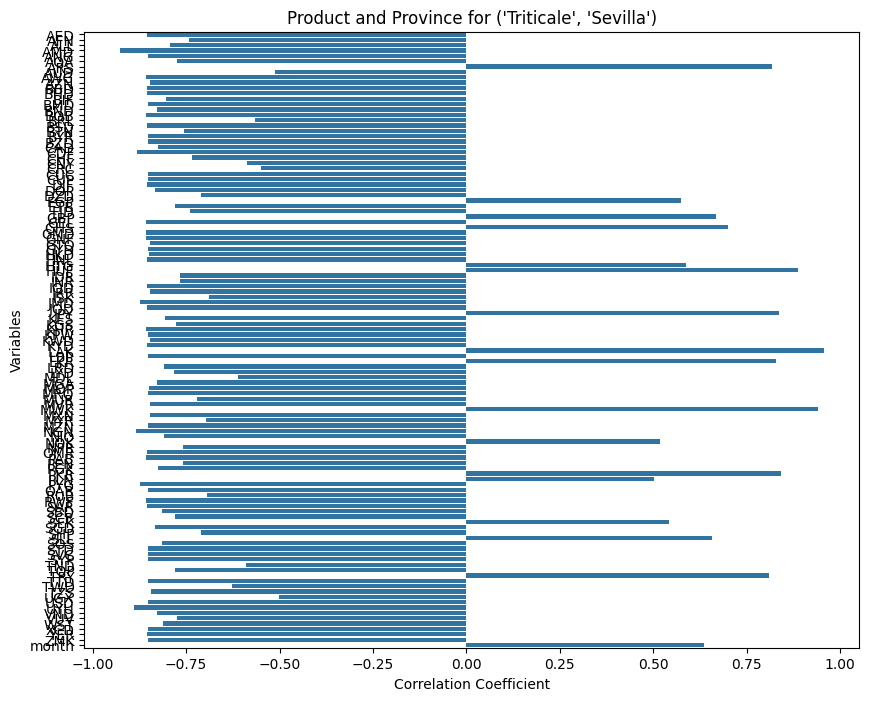

In [14]:
def visualize_significant_correlations(correlations, threshold=0.5, title="Significant Correlations"):
    significant_correlations = {k: v for k, v in correlations.items() if (v.abs() >= threshold).any()}
    for group_name, corr in significant_correlations.items():
        significant_corr = corr[corr.abs() >= threshold]
        plt.figure(figsize=(10, 8))
        sns.barplot(x=significant_corr.values, y=significant_corr.index)
        plt.title(f"{title} for {group_name}")
        plt.xlabel('Correlation Coefficient')
        plt.ylabel('Variables')
        plt.show()


# Visualize significant correlations for Product and Province grouping
visualize_significant_correlations(correlations_results['By Product and Province'], threshold=0.5, title="Product and Province")


The observation that correlations are higher when grouped by both product type and region suggests that the relationship between product prices and exchange rates is influenced by regional factors. Here's what this could mean:

#### Insights and Interpretation

**Regional Variability:**

- Different regions might have varying levels of dependency on certain currencies. For example, a region that exports a significant amount of its products to a country with a specific currency might show a stronger correlation with that currency.

- Local economic conditions, transportation costs, and regional demand-supply dynamics can vary, affecting how prices respond to exchange rate fluctuations.
  
**Localized Economic Influences:**

Economic policies, trade agreements, and market conditions can differ by region. These local factors can amplify or dampen the impact of exchange rates on product prices.

Regions with stronger economic ties to specific countries or regions (reflected by certain currencies) will exhibit higher correlations with those currencies.

**Data Granularity:**

Aggregating data across all regions may dilute the correlations, as opposing regional trends can cancel each other out. By analyzing data at a more granular level (product type and region), you capture more specific relationships.
This suggests that a one-size-fits-all model for predicting prices based on exchange rates might be less effective than region-specific models.


#### Investigating High Correlations

In [15]:
# Define a function to find groups with high correlations
def find_high_correlations(correlations, threshold=0.9):
    high_corr_groups = {}
    for group_name, corr in correlations.items():
        high_corr = corr[corr.abs() >= threshold]
        if not high_corr.empty:
            high_corr_groups[group_name] = high_corr
    return high_corr_groups

# Find groups with high correlations
high_corr_groups = find_high_correlations(correlations_results['By Product and Province'], threshold=0.9)
print("Groups with High Correlations:")
for group_name, high_corr in high_corr_groups.items():
    print(f"{group_name}:")
    print(high_corr)
    print()


Groups with High Correlations:
('Avena', 'Sevilla'):
AMD   -0.953913
CDF   -0.917608
HUF    0.904251
JMD   -0.907330
KHR   -0.901754
LAK    0.961139
MXN   -0.902134
NGN   -0.920217
PYG   -0.915149
UYU   -0.932045
Name: price, dtype: float64

('Cebada', 'Salamanca'):
AFN   -0.962937
ARS    0.929210
BWP    0.905520
GEL   -0.941126
LAK    0.943993
NZD    0.921824
PGK   -0.913257
SLL    0.986026
SZL    0.934164
Name: price, dtype: float64

('Cebada', 'Sevilla'):
AMD   -0.941081
LAK    0.963736
MWK    0.912496
Name: price, dtype: float64

('Maíz', 'Sevilla'):
LAK    0.910650
MWK    0.909503
Name: price, dtype: float64

('Trigo', 'Salamanca'):
AFN   -0.962546
ARS    0.928261
GEL   -0.930051
LAK    0.937102
NZD    0.901489
SLL    0.982000
SZL    0.921802
Name: price, dtype: float64

('Triticale', 'Sevilla'):
AMD   -0.928129
LAK    0.957068
MWK    0.939952
Name: price, dtype: float64



#### Statistical Tests

Performing statistical tests such as the Pearson correlation test and p-value calculation to validate the significance of the correlations.

In [16]:
from scipy.stats import pearsonr

# Function to perform Pearson correlation test
def validate_correlations(data, groupby_columns, high_corr_groups):
    validation_results = {}
    
    # Group data by specified columns
    grouped_data = data.groupby(groupby_columns)
    
    for group_name, high_corr in high_corr_groups.items():
        group_data = grouped_data.get_group(group_name)
        results = {}
        for variable in high_corr.index:
            r, p_value = pearsonr(group_data['price'], group_data[variable])
            results[variable] = {'correlation': r, 'p_value': p_value}
        validation_results[group_name] = results
    
    return validation_results

# Validate high correlations using Pearson correlation test
validation_results = validate_correlations(merged_data, ['product.meta_product.name', 'province.name'], high_corr_groups)
print("Validation Results:")
for group_name, results in validation_results.items():
    print(f"{group_name}:")
    for variable, stats in results.items():
        print(f"{variable} - Correlation: {stats['correlation']}, P-value: {stats['p_value']}")
    print()


Validation Results:
('Avena', 'Sevilla'):
AMD - Correlation: -0.9539134397003718, P-value: 2.0930192468447236e-20
CDF - Correlation: -0.9176078834437101, P-value: 5.390317489292457e-16
HUF - Correlation: 0.9042513646473455, P-value: 7.201011750089901e-15
JMD - Correlation: -0.9073304265690548, P-value: 4.10319006013868e-15
KHR - Correlation: -0.9017543574981036, P-value: 1.1207643141328232e-14
LAK - Correlation: 0.9611385106011616, P-value: 1.0316869497262594e-21
MXN - Correlation: -0.9021339683894319, P-value: 1.0486716704377759e-14
NGN - Correlation: -0.9202168361605328, P-value: 3.0870635930505817e-16
PYG - Correlation: -0.9151490478278905, P-value: 8.965144191547559e-16
UYU - Correlation: -0.9320452639775968, P-value: 1.89623135168331e-17

('Cebada', 'Salamanca'):
AFN - Correlation: -0.9629369532174166, P-value: 0.0004978845545267287
ARS - Correlation: 0.9292104570350128, P-value: 0.002464363876544262
BWP - Correlation: 0.9055199412126237, P-value: 0.005005655077345575
GEL - Correl

#### Visualizations
Creating a scatter plots to visually inspect the relationships between variables with high correlations and the price.

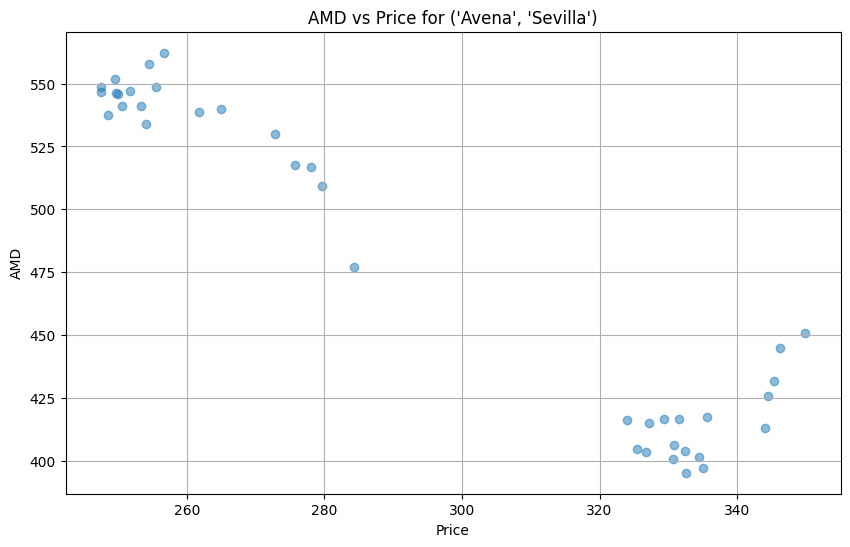

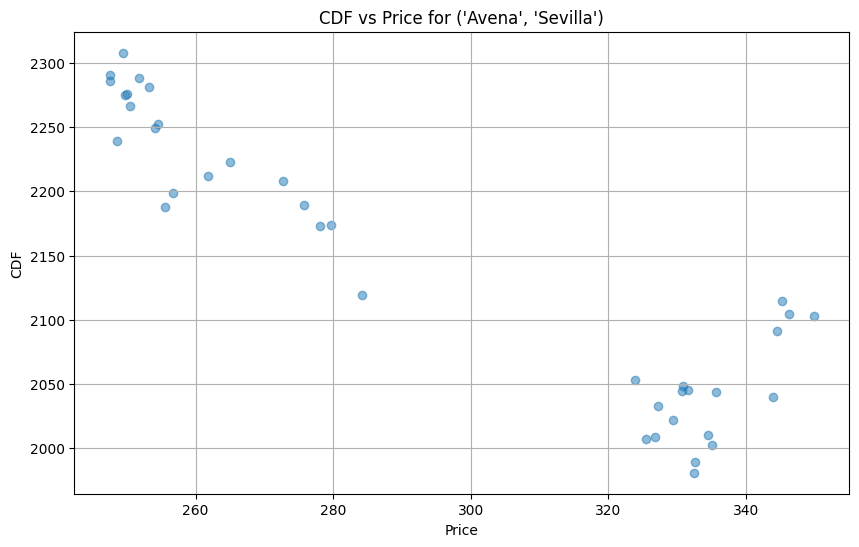

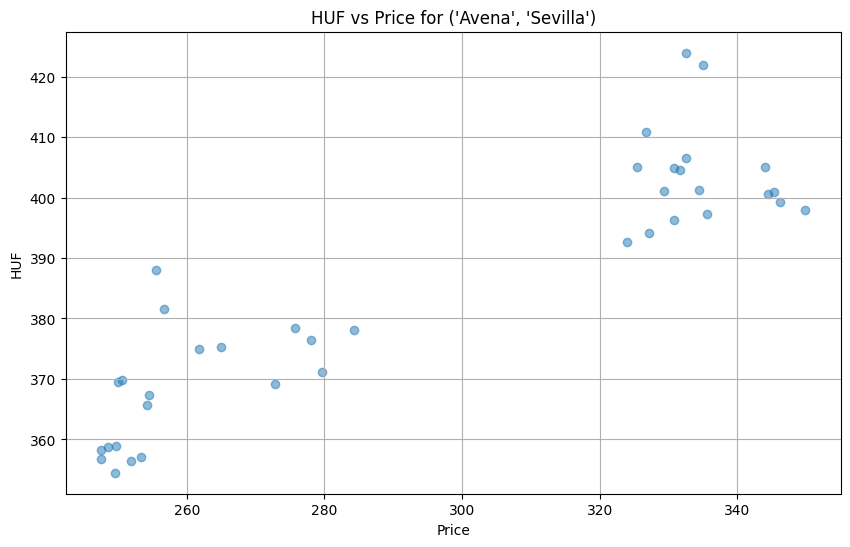

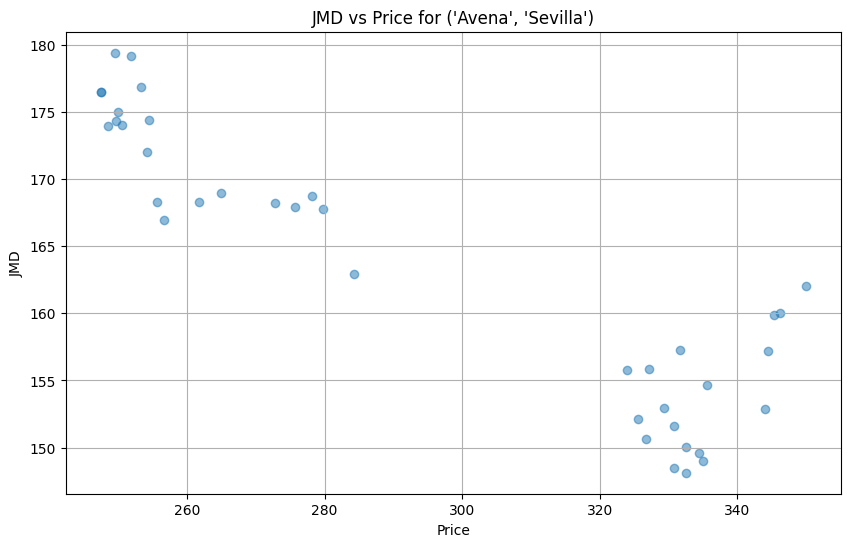

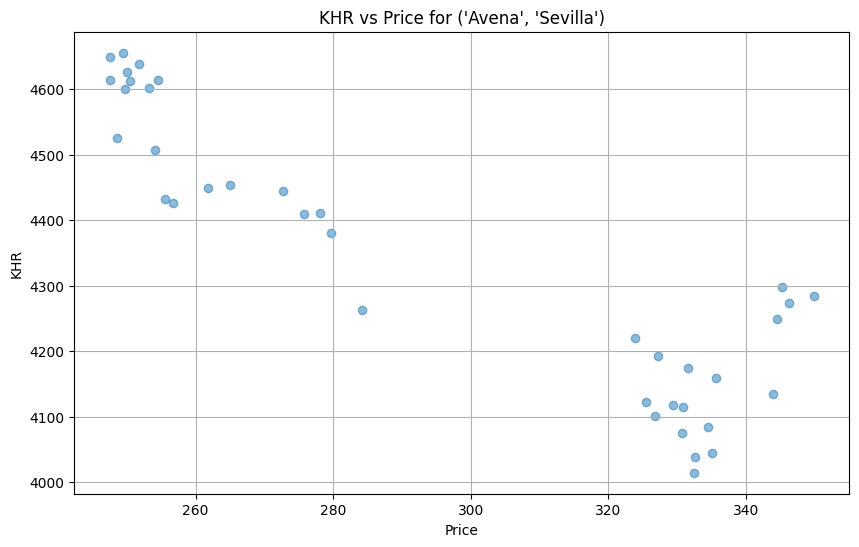

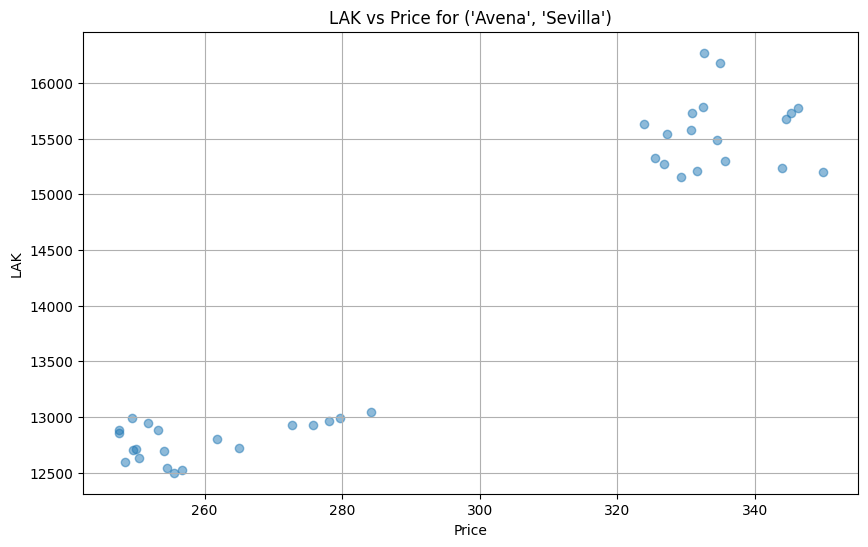

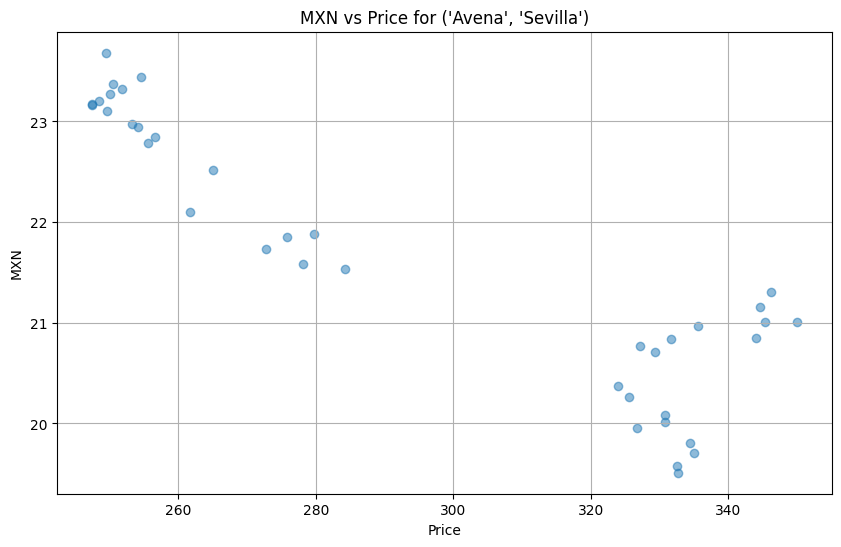

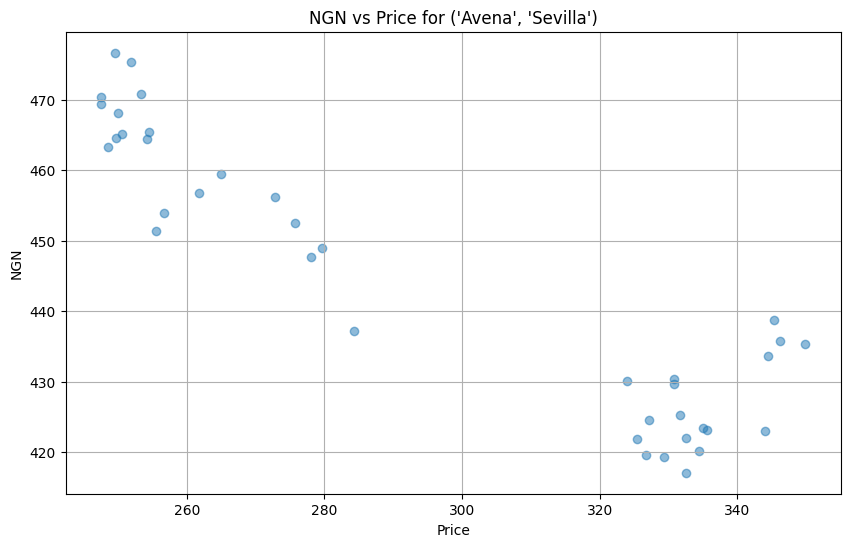

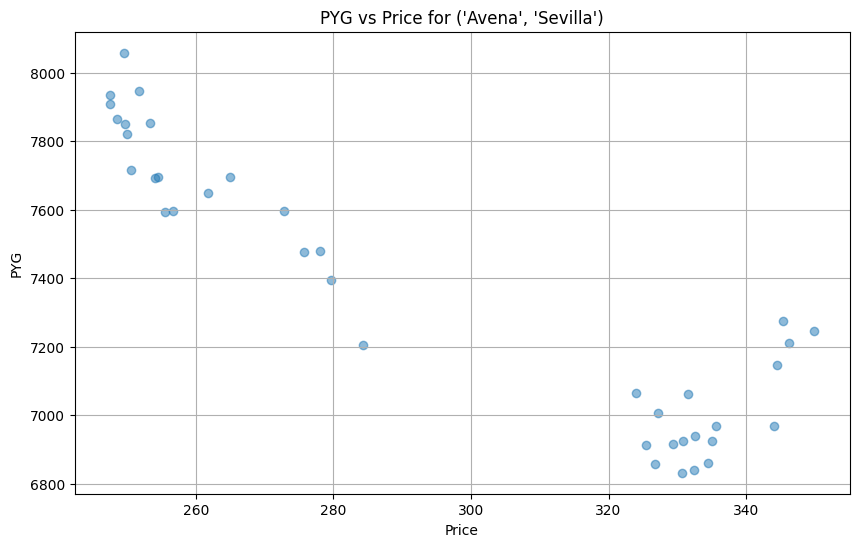

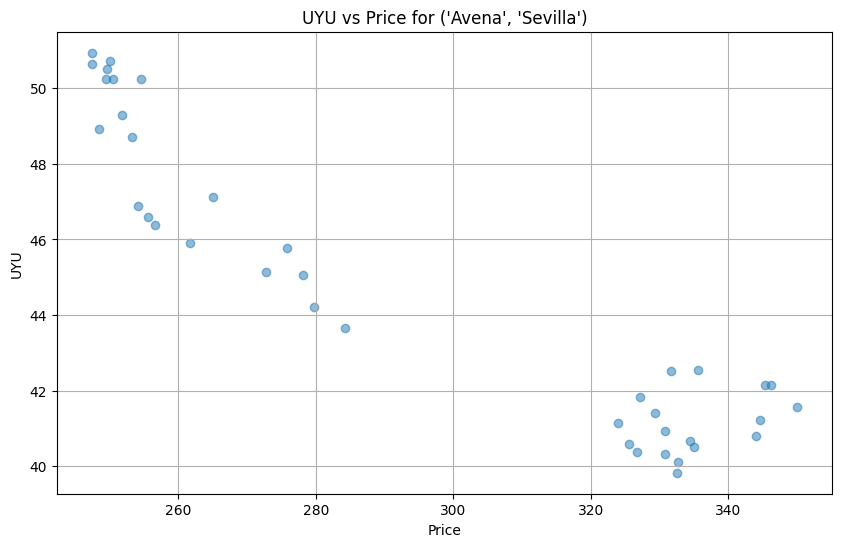

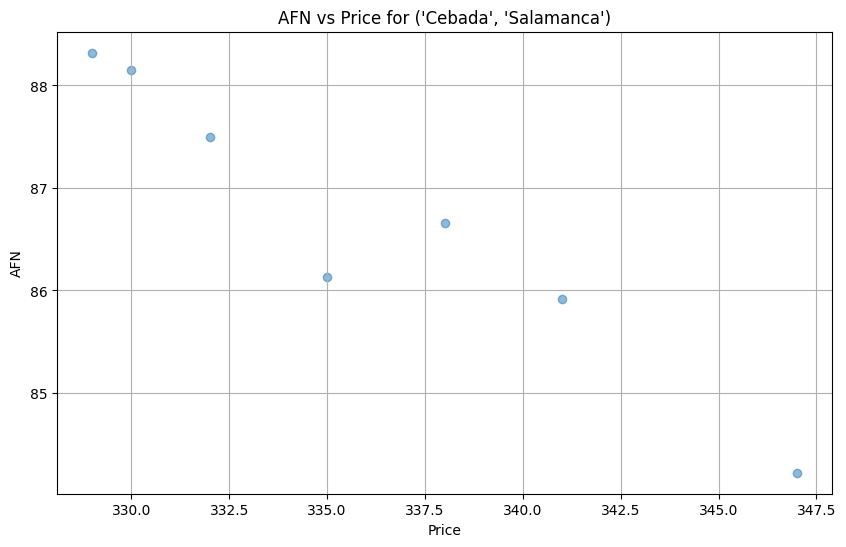

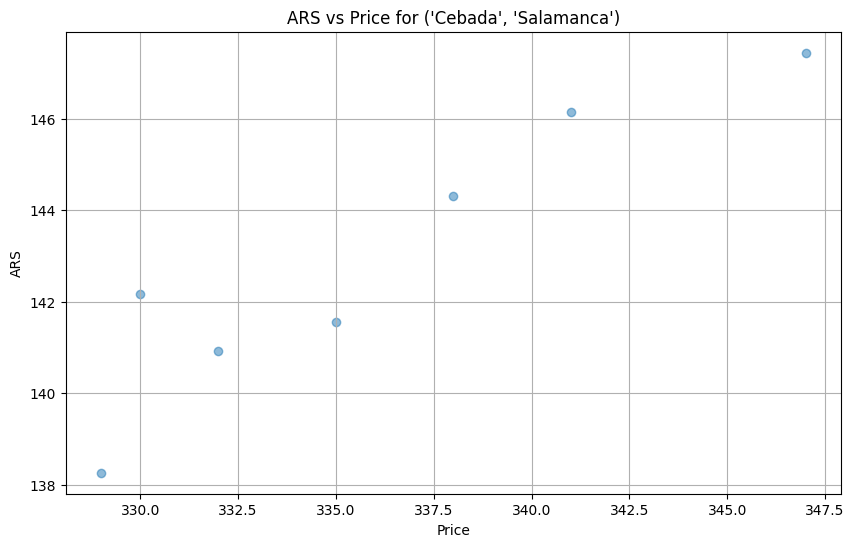

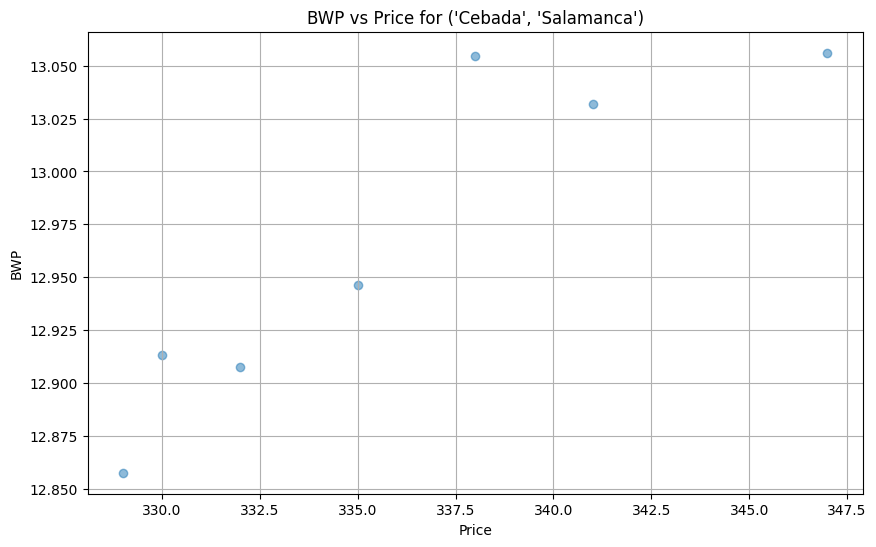

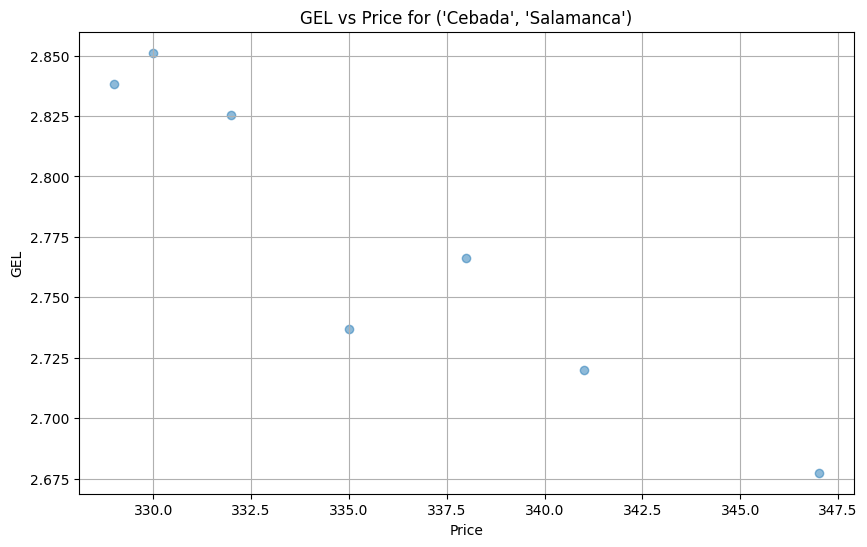

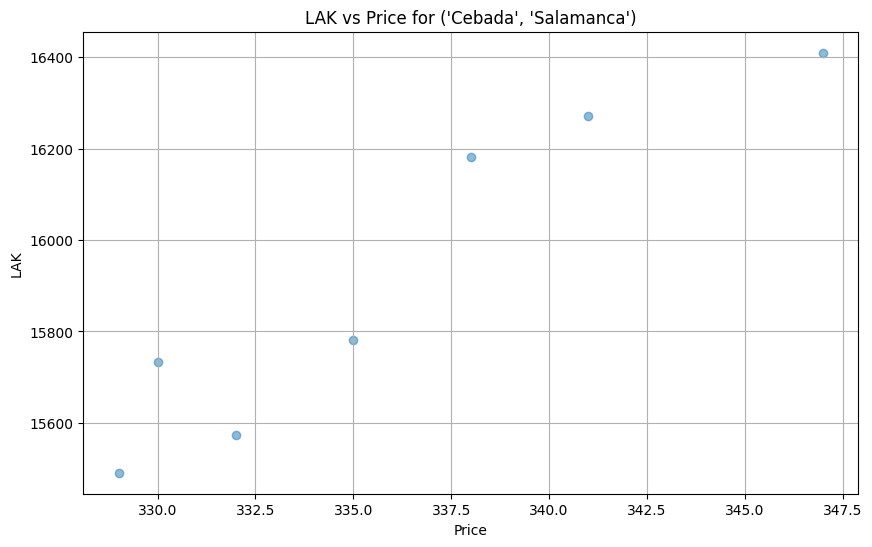

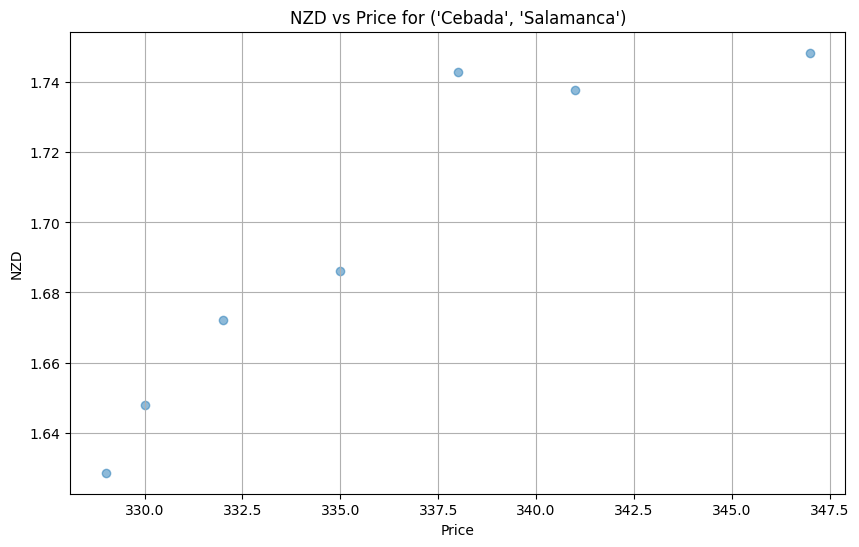

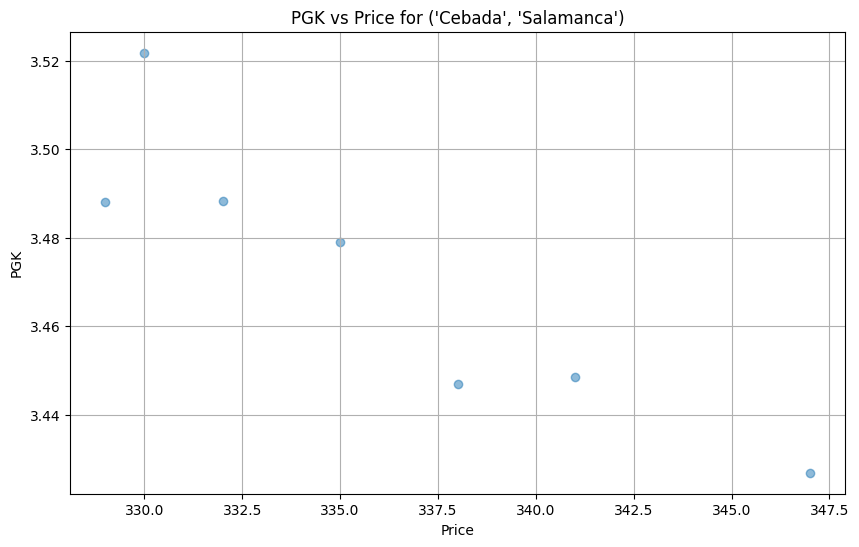

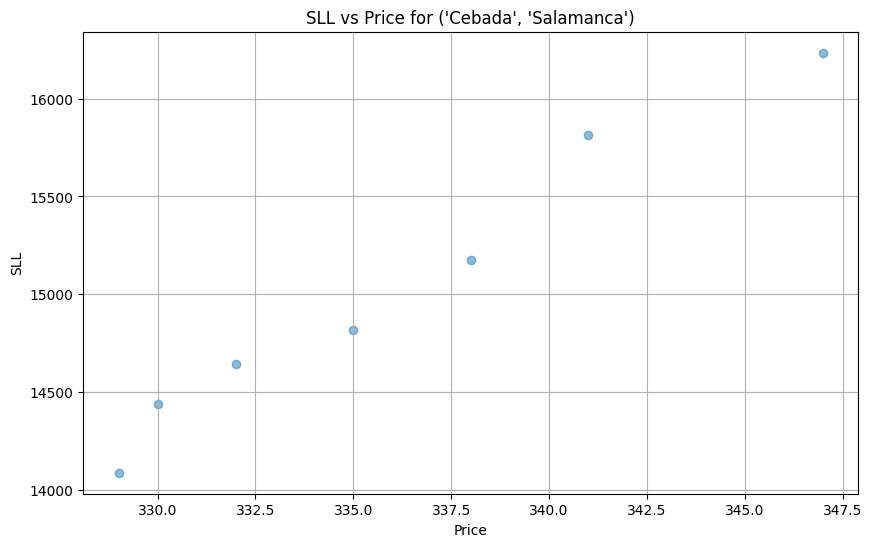

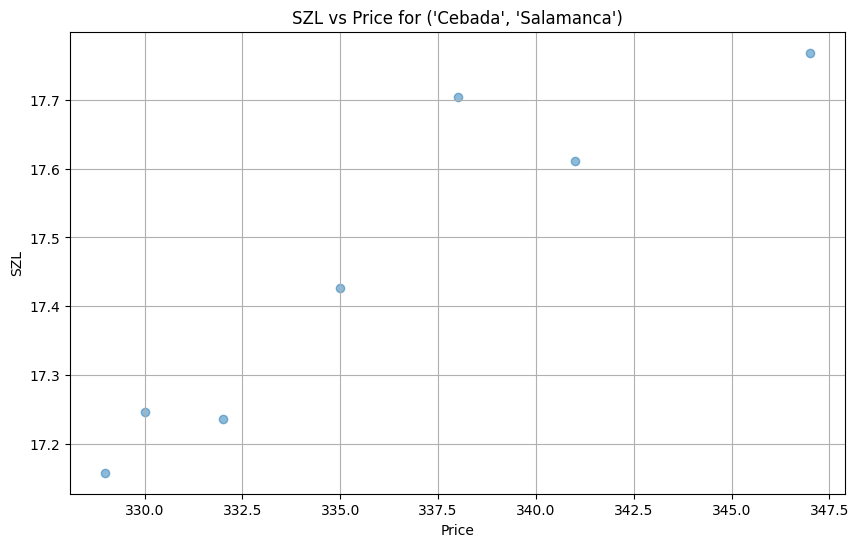

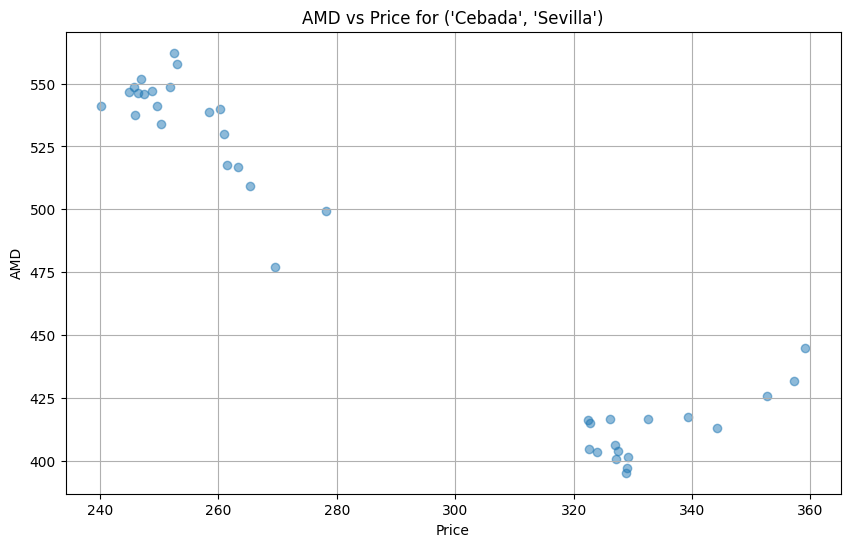

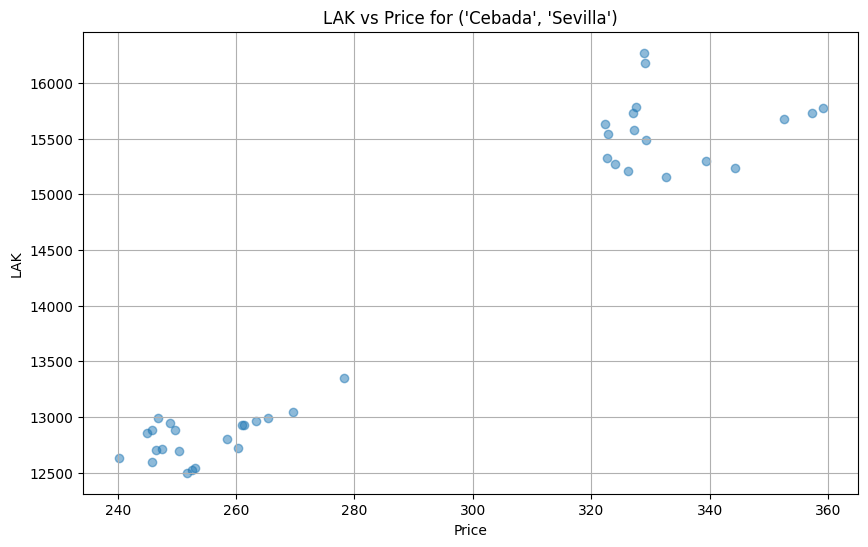

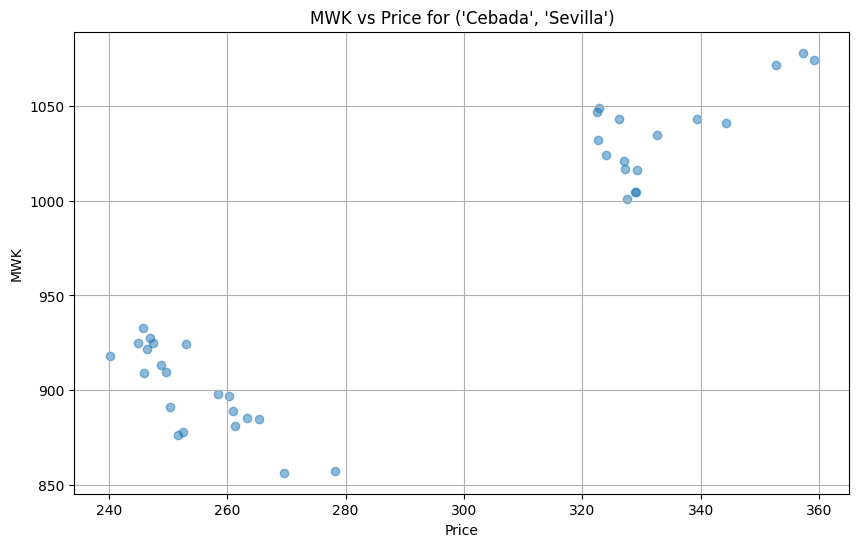

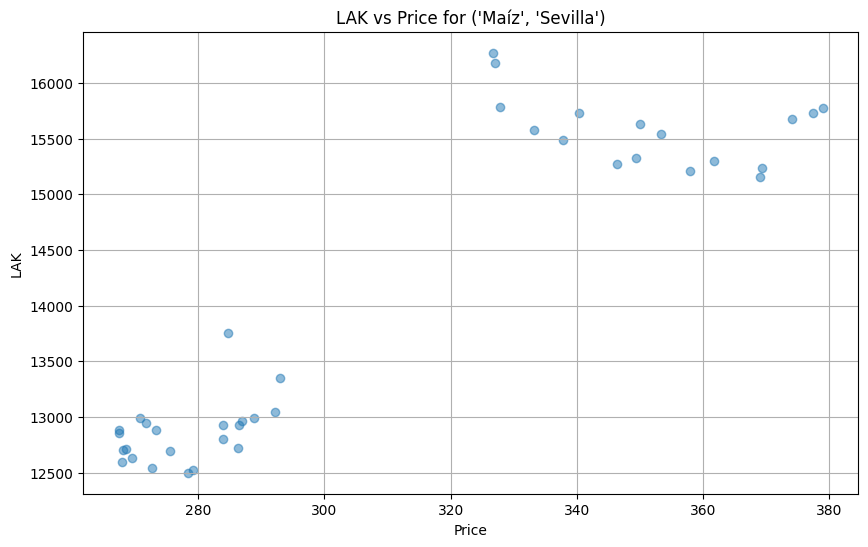

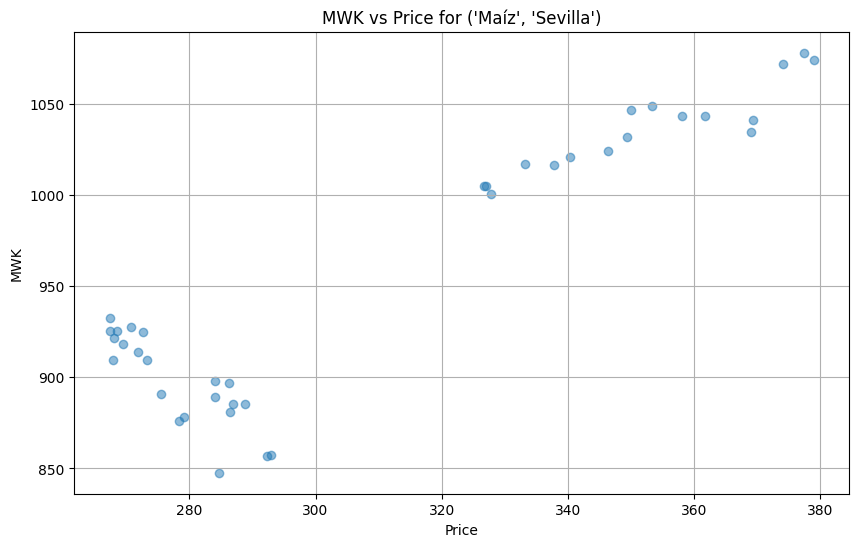

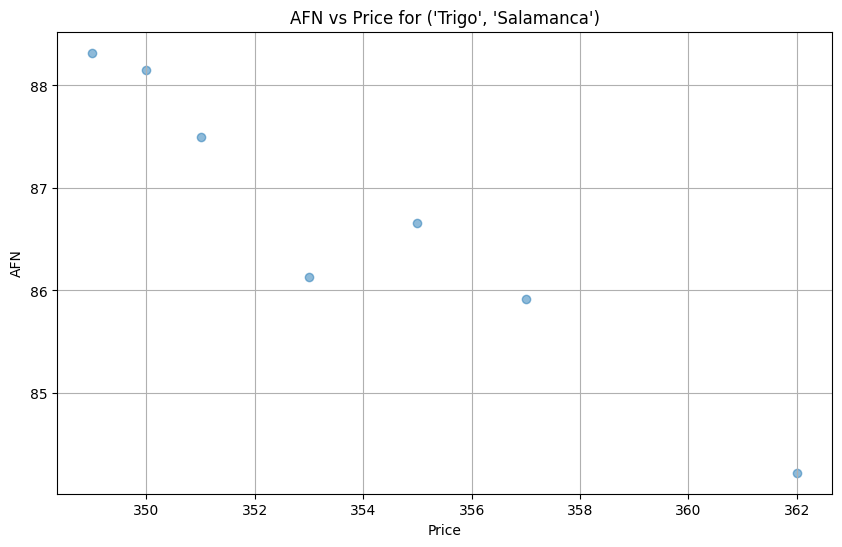

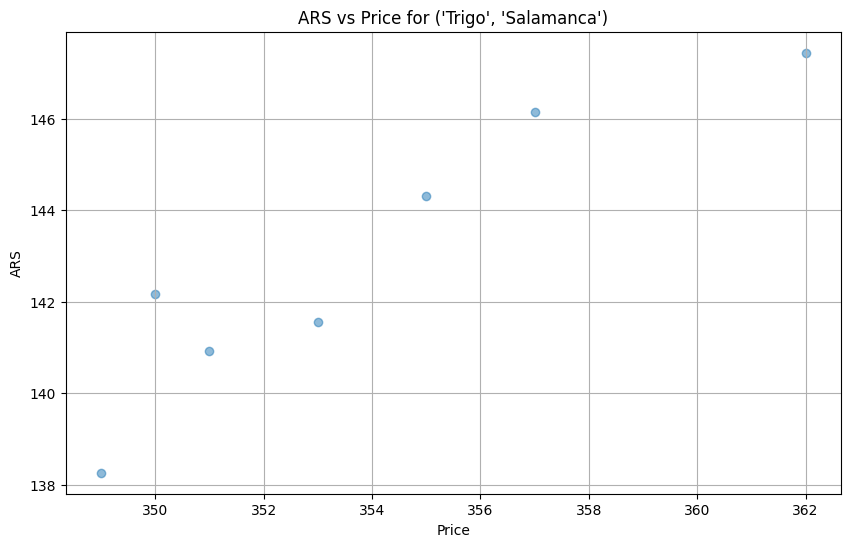

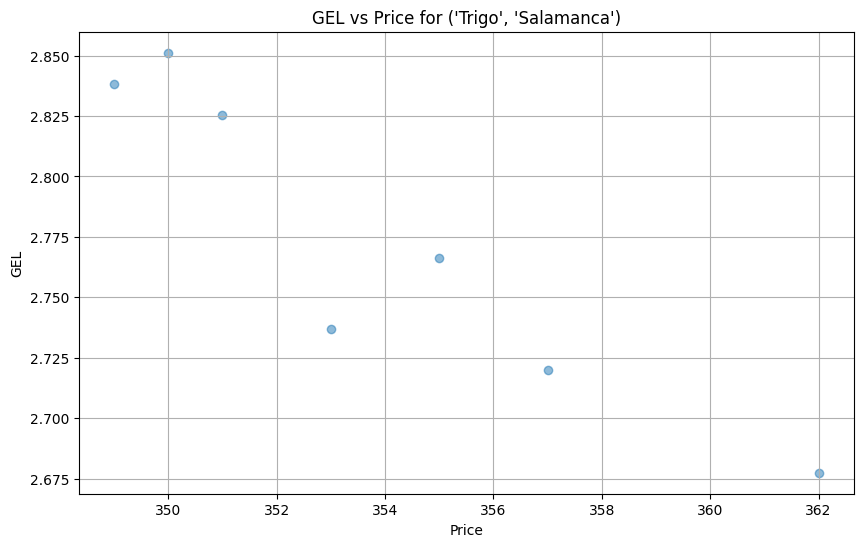

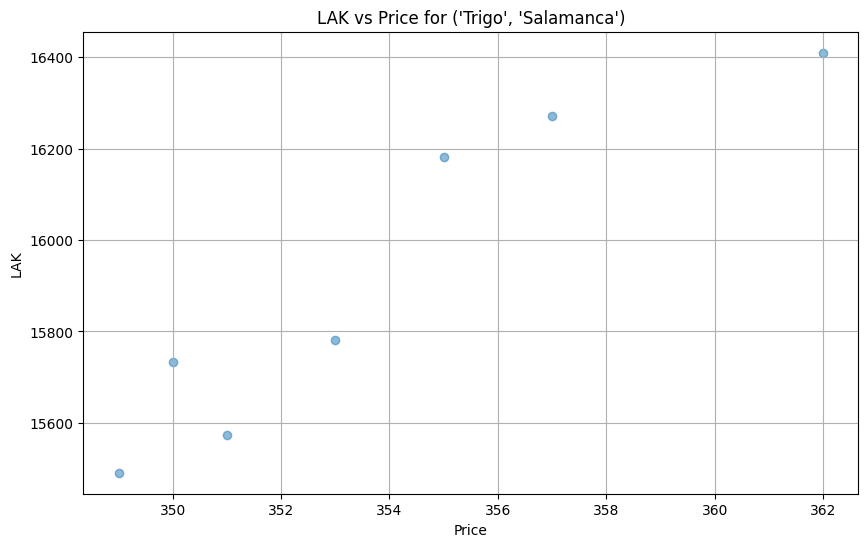

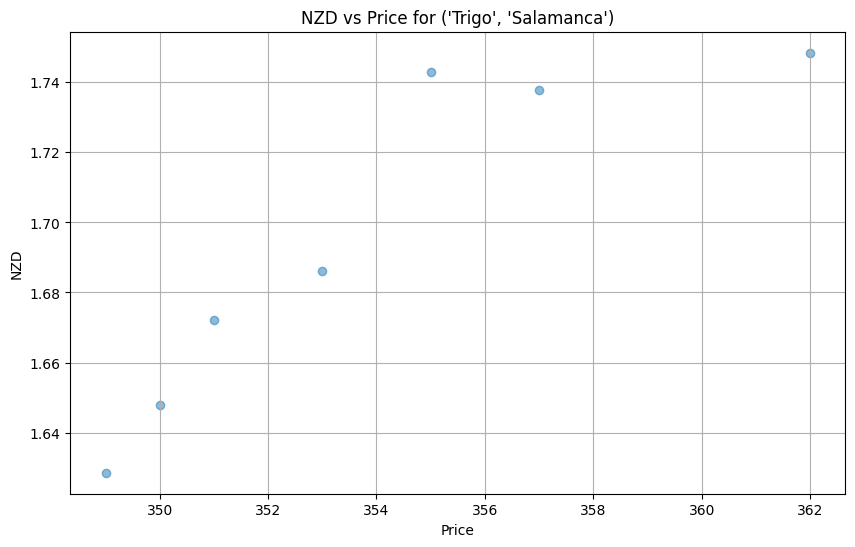

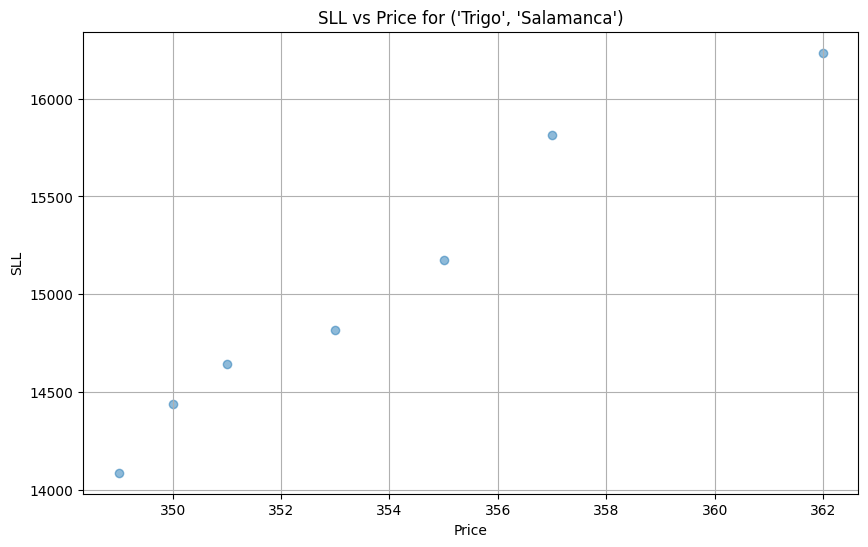

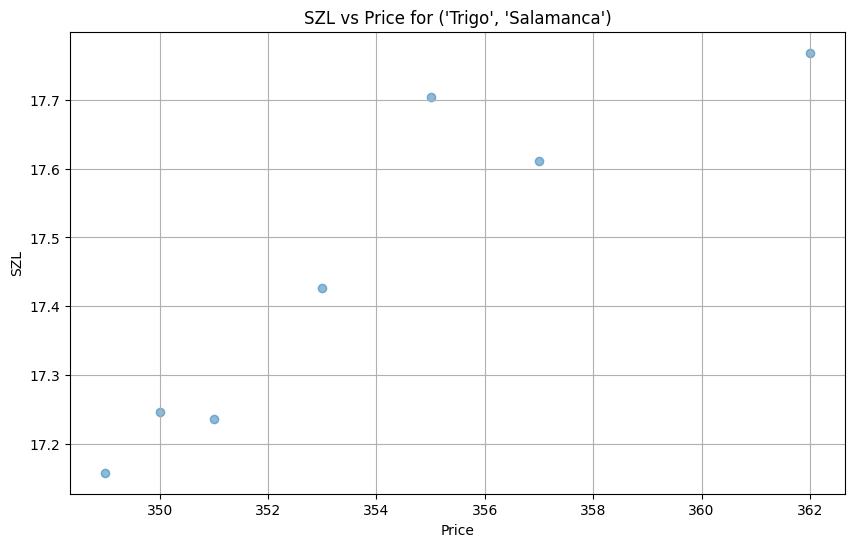

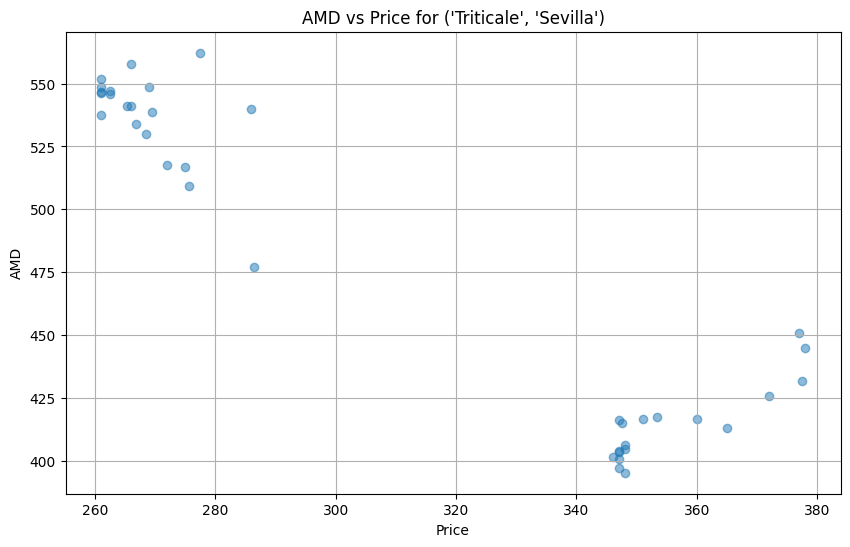

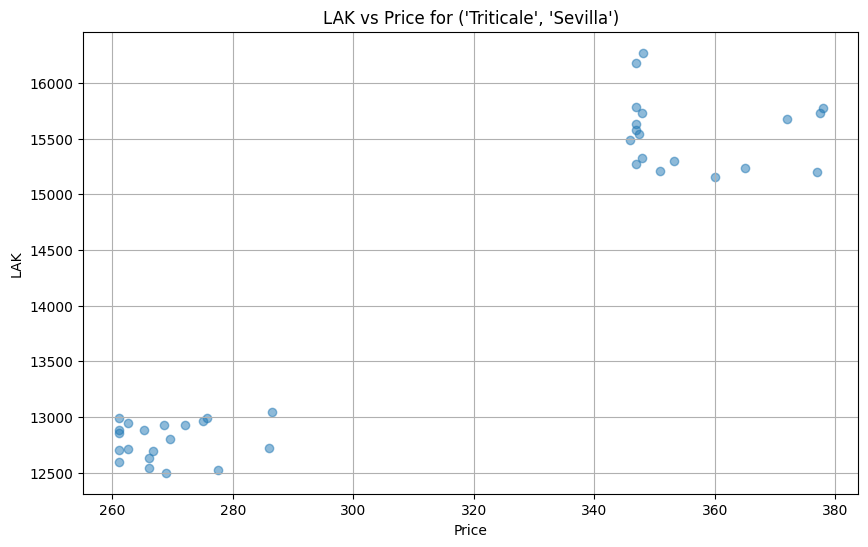

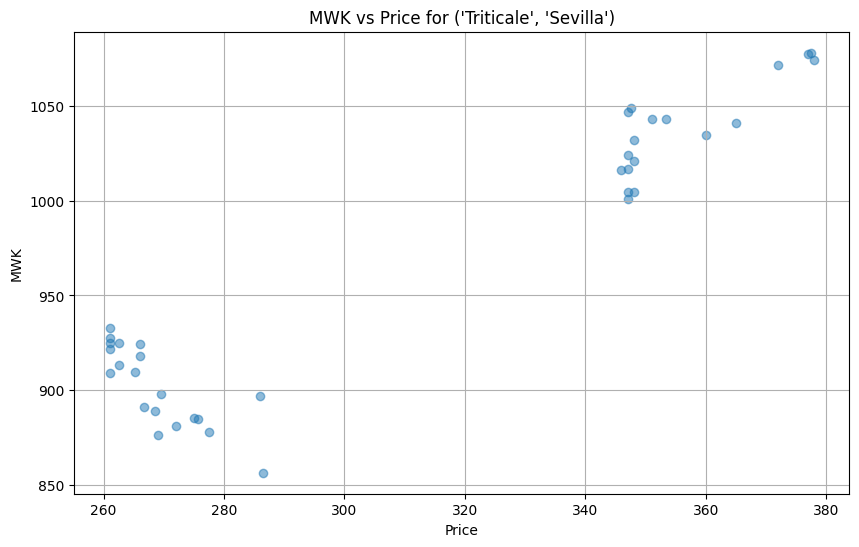

In [17]:
import matplotlib.pyplot as plt

# Function to plot scatter plots for high correlations
def plot_high_correlations(data, groupby_columns, high_corr_groups):
    grouped_data = data.groupby(groupby_columns)
    
    for group_name, high_corr in high_corr_groups.items():
        group_data = grouped_data.get_group(group_name)
        for variable in high_corr.index:
            plt.figure(figsize=(10, 6))
            plt.scatter(group_data['price'], group_data[variable], alpha=0.5)
            plt.title(f"{variable} vs Price for {group_name}")
            plt.xlabel('Price')
            plt.ylabel(variable)
            plt.grid(True)
            plt.show()

# Plot scatter plots for high correlations
plot_high_correlations(merged_data, ['product.meta_product.name', 'province.name'], high_corr_groups)


#### Explanation 
The investigation into high correlation values between product prices and currency exchange rates yielded the following insights:

**Groups with High Correlations**
- **('Avena', 'Sevilla'):**
  
    - Negative Correlations:
        - Armenian Dram (AMD)
        - Congolese Franc (CDF)
        - Jamaican Dollar (JMD)
        - Cambodian Riel (KHR)
        - Mexican Peso (MXN)
        - Nigerian Naira (NGN)
        - Paraguayan Guarani (PYG)
        - Uruguayan Peso (UYU)


    - Positive Correlations:
        - Hungarian Forint (HUF)
        - Laotian Kip (LAK)
          
Validation results show very low p-values, indicating these correlations are statistically significant.

- **('Cebada', 'Sevilla'):**

    - Negative Correlation:
        - Armenian Dram (AMD)
          
    - Positive Correlations:
        - Laotian Kip (LAK)
        - Malawian Kwacha (MWK)
          
All correlations are statistically significant with very low p-values.

- **('Maíz', 'Sevilla'):**

    - Positive Correlations:
        - Laotian Kip (LAK)
        - Malawian Kwacha (MWK)
          
Statistically significant as indicated by low p-values.

- **('Triticale', 'Sevilla'):**
    
    - Negative Correlation:
        - Armenian Dram (AMD)
          
    - Positive Correlations:
        - Laotian Kip (LAK)
        - Malawian Kwacha (MWK)
          
Statistically significant with low p-values.

- **('Cebada', 'Salamanca'):**

    - Negative Correlations:
        - Afghan Afghani (AFN)
        - Georgian Lari (GEL)
          
    - Positive Correlations:
        - Argentine Peso (ARS)
        - Botswanan Pula (BWP)
        - Laotian Kip (LAK)
        - New Zealand Dollar (NZD)
        - Sierra Leonean Leone (SLL)
        - Swazi Lilangeni (SZL)
          
Statistically significant correlations confirmed by low p-values.

- **('Trigo', 'Salamanca'):**

    - Negative Correlations:
        - Afghan Afghani (AFN)
        - Georgian Lari (GEL)
          
    - Positive Correlations:
        - Argentine Peso (ARS)
        - Laotian Kip (LAK)
        - New Zealand Dollar (NZD)
        - Sierra Leonean Leone (SLL)
        - Swazi Lilangeni (SZL)
          
All correlations are statistically significant with very low p-values.


#### Visual Examination
The scatter plots provided show a clear linear relationship between the price of Avena and various currencies. These plots further confirm the high correlation values observed in the statistical analysis.

#### Conclusion
The high correlation values observed in the "By Product and Province" grouping are statistically significant and supported by visual inspection. These strong relationships suggest that currency exchange rates have a significant impact on product prices at a granular level.

Processing group: ('Avena', 'León'), Data Points: 35
Processing group: ('Avena', 'Navarra'), Data Points: 1
Processing group: ('Avena', 'Salamanca'), Data Points: 3
Processing group: ('Avena', 'Segovia'), Data Points: 2
Processing group: ('Avena', 'Sevilla'), Data Points: 38
Processing group: ('Avena', 'Toledo'), Data Points: 1
Processing group: ('Avena', 'Zamora'), Data Points: 2
Processing group: ('Cebada', 'Albacete'), Data Points: 2
Processing group: ('Cebada', 'Burgos'), Data Points: 1
Processing group: ('Cebada', 'Cuenca'), Data Points: 2
Processing group: ('Cebada', 'León'), Data Points: 40
Processing group: ('Cebada', 'Palencia'), Data Points: 2
Processing group: ('Cebada', 'Salamanca'), Data Points: 7
Processing group: ('Cebada', 'Segovia'), Data Points: 4
Processing group: ('Cebada', 'Sevilla'), Data Points: 38
Processing group: ('Cebada', 'Toledo'), Data Points: 4
Processing group: ('Cebada', 'Valladolid'), Data Points: 2
Processing group: ('Cebada', 'Zamora'), Data Points: 

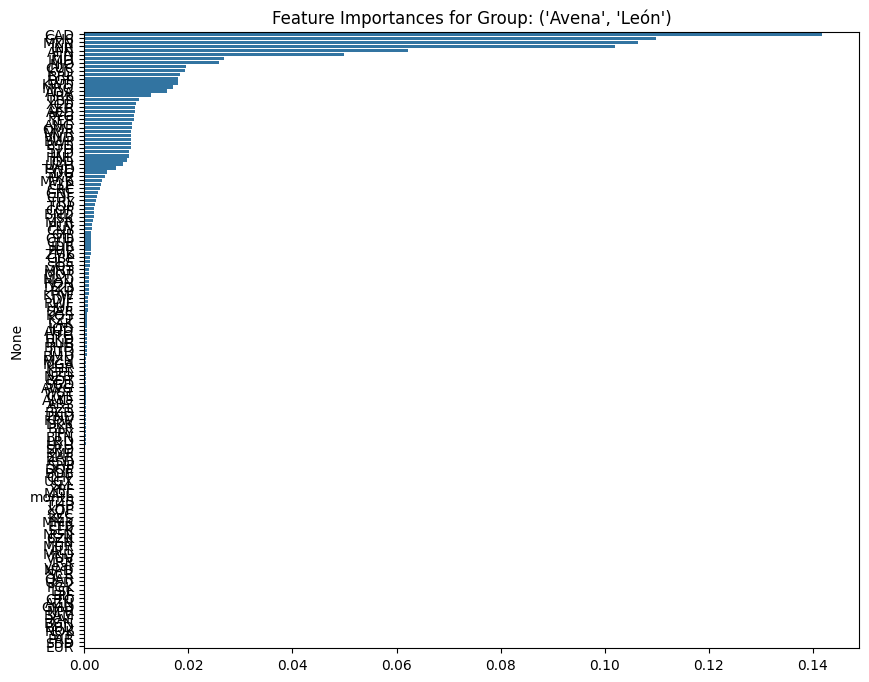

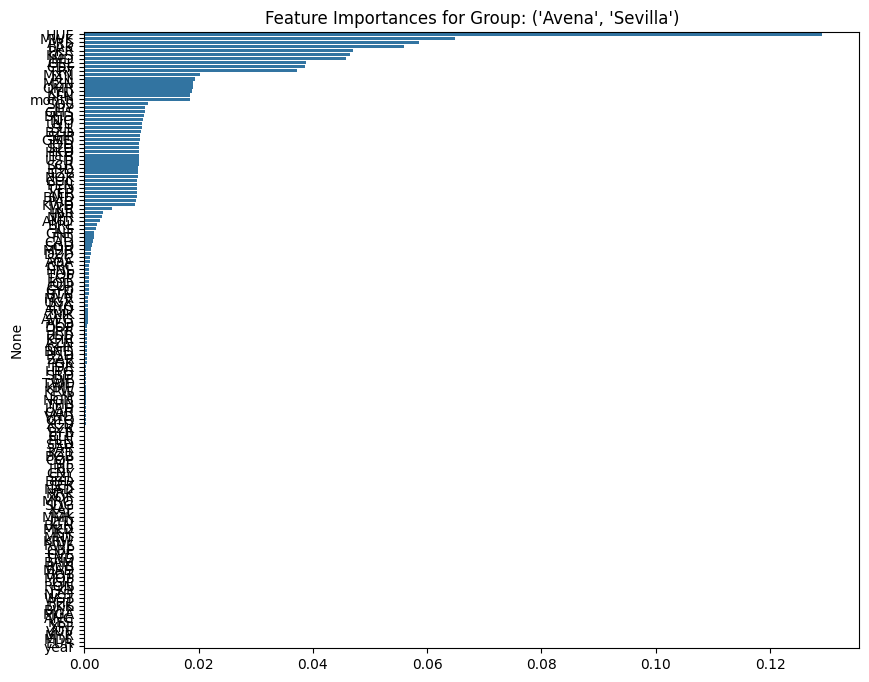

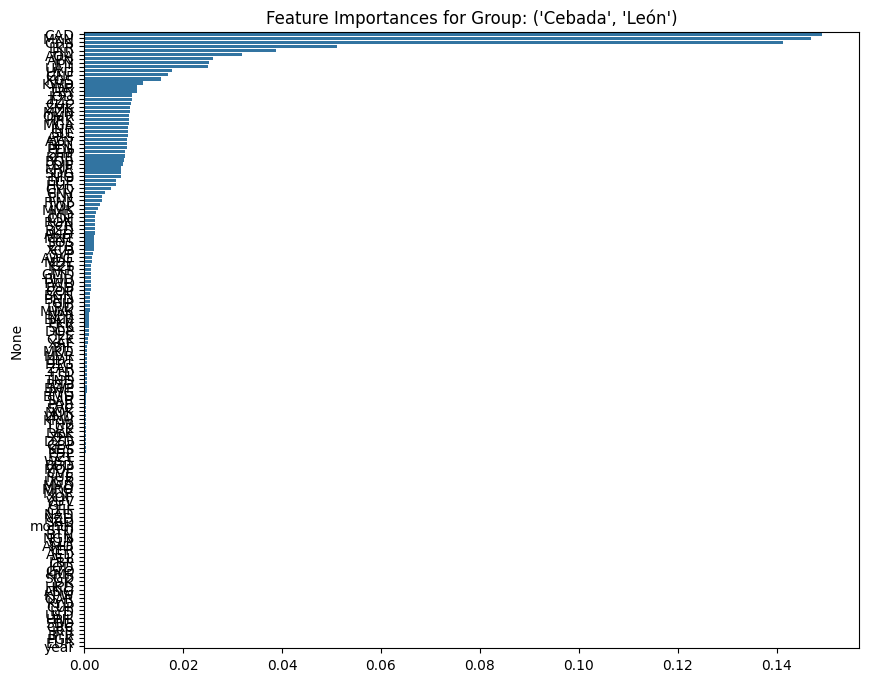

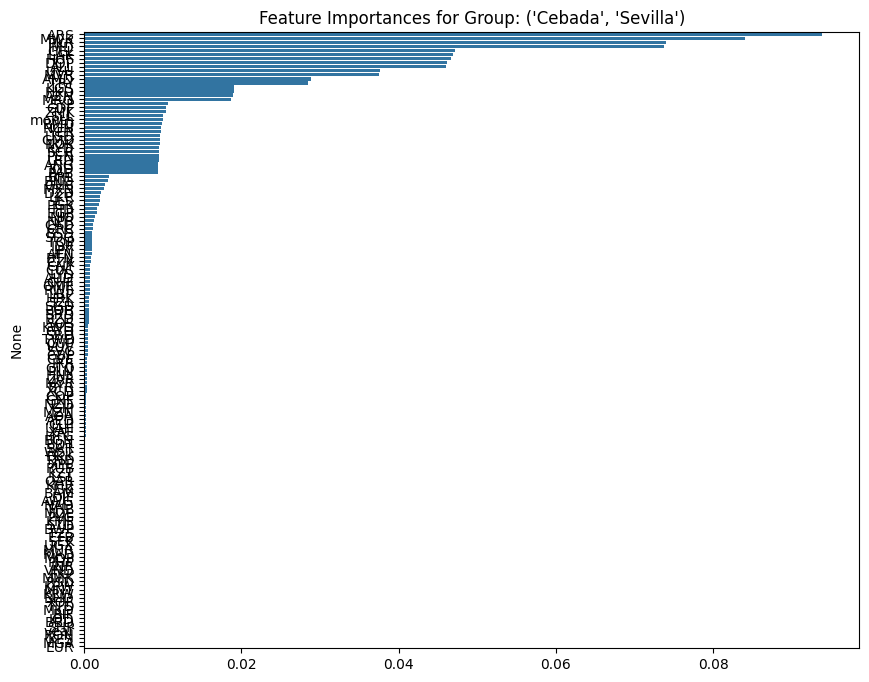

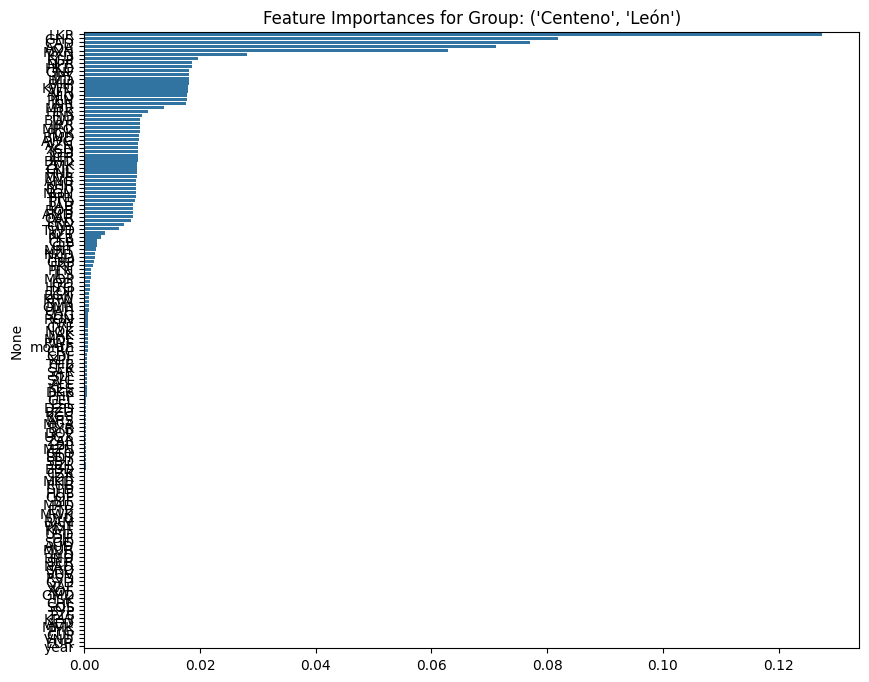

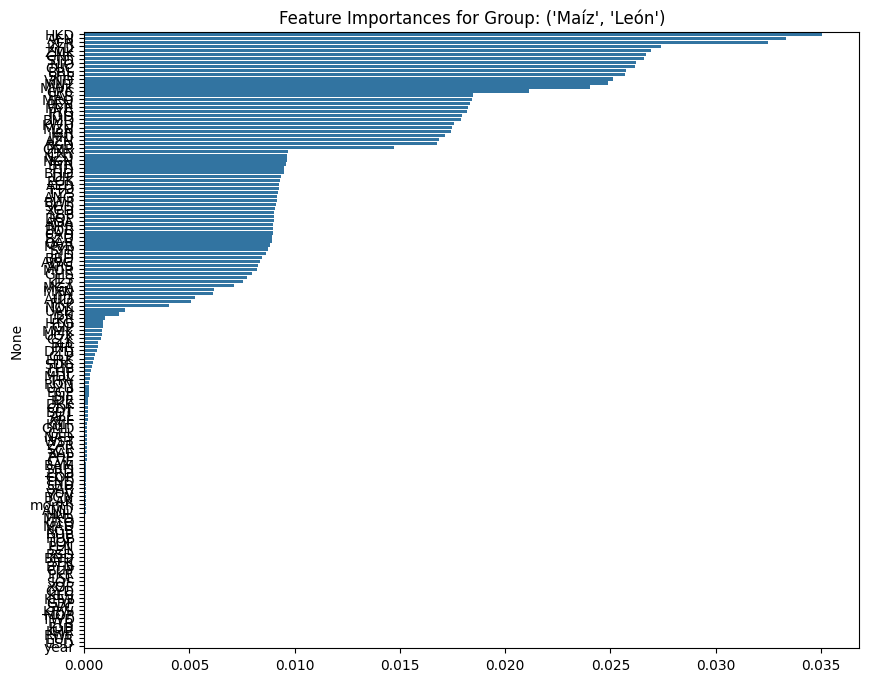

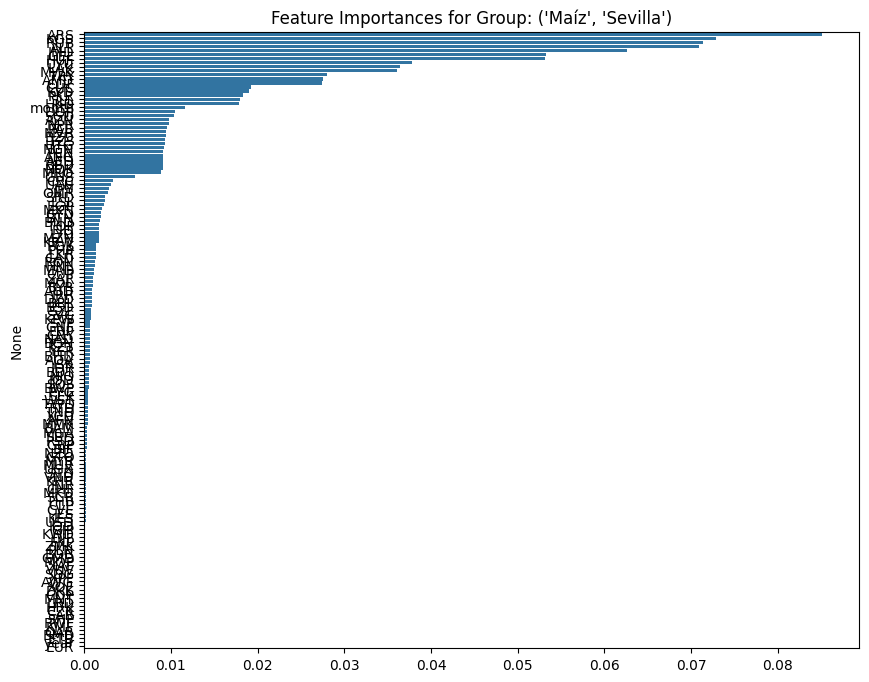

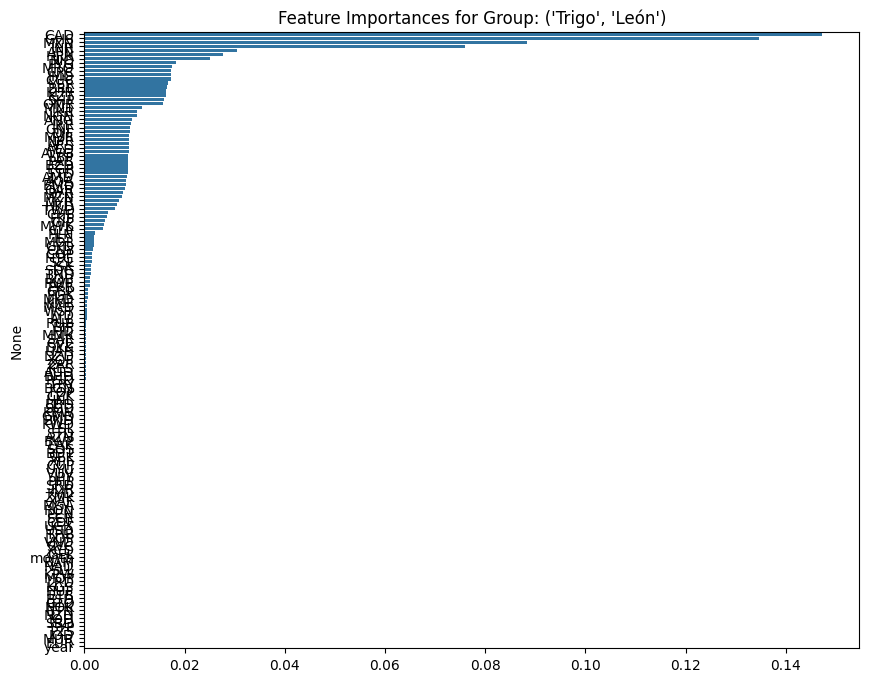

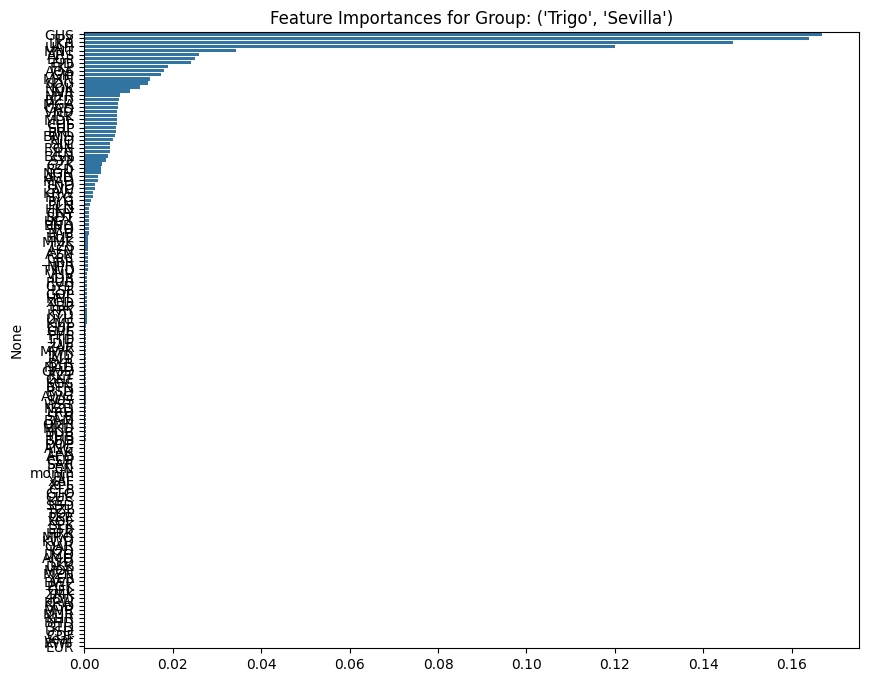

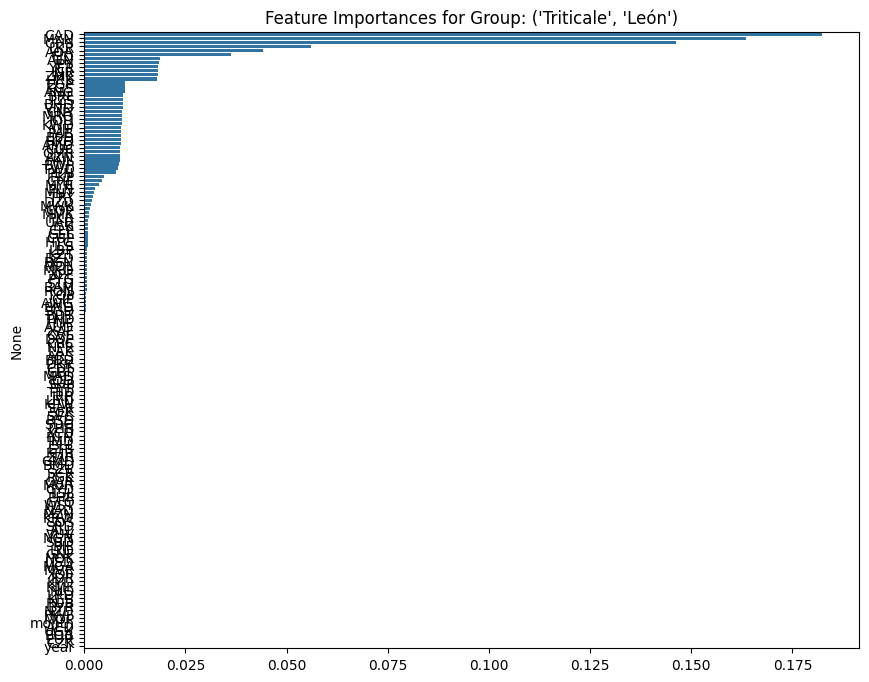

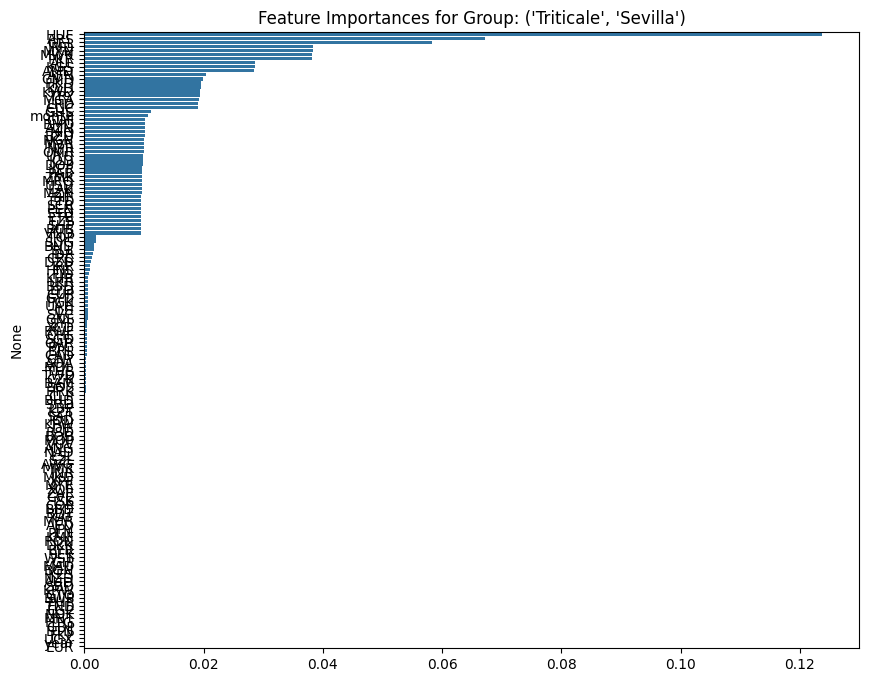

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_data is already loaded and preprocessed

# Function to train model and get feature importances for each group
def get_feature_importances_by_group(data, groupby_columns):
    feature_importances = {}

    groups = data.groupby(groupby_columns)
    for group_name, group_data in groups:
        print(f"Processing group: {group_name}, Data Points: {group_data.shape[0]}")

        if group_data.shape[0] > 10:  # Ensure there are enough data points for training
            # Separate features and target
            X = group_data.drop(columns=['price', 'date', 'product.meta_product.name', 'province.name'])
            y = group_data['price']

            # Impute missing values
            imputer = SimpleImputer(strategy='mean')
            X_imputed = imputer.fit_transform(X)

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

            # Initialize and train the Random Forest model
            rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
            rf_model.fit(X_train, y_train)

            # Get feature importance scores
            feature_importances[group_name] = pd.Series(rf_model.feature_importances_, index=X.columns)

    return feature_importances

# Get feature importances by Product and Province
feature_importances_by_product_province = get_feature_importances_by_group(merged_data, ['product.meta_product.name', 'province.name'])

# Function to plot feature importances
def plot_feature_importances(feature_importances, group_name):
    sorted_importances = feature_importances.sort_values(ascending=False)
    plt.figure(figsize=(10, 8))
    sns.barplot(x=sorted_importances.values, y=sorted_importances.index)
    plt.title(f'Feature Importances for Group: {group_name}')
    plt.show()

# Plot feature importances for each group
for group_name, importances in feature_importances_by_product_province.items():
    plot_feature_importances(importances, group_name)


In [32]:
# Function to get top features by importance
def get_top_features(feature_importances, top_n=5):
    return feature_importances.sort_values(ascending=False).head(top_n).index

# Example: Select top 5 features for each group
top_features_by_group = {group: get_top_features(importances, top_n=5) for group, importances in feature_importances_by_product_province.items()}


In [34]:
# Function to filter data by top features and train model
def filter_and_train(data, groupby_columns, top_features_by_group):
    results = {}
    groups = data.groupby(groupby_columns)
    
    for group_name, group_data in groups:
        print(f"Processing group: {group_name}, Data Points: {group_data.shape[0]}")

        if group_name in top_features_by_group:
            top_features = top_features_by_group[group_name]
            
            if group_data.shape[0] > 10:  # Ensure there are enough data points for training
                # Separate features and target
                X = group_data[top_features]
                y = group_data['price']

                # Impute missing values
                imputer = SimpleImputer(strategy='mean')
                X_imputed = imputer.fit_transform(X)

                # Split the data into training and testing sets
                X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

                # Initialize and train the Random Forest model
                rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
                rf_model.fit(X_train, y_train)

                # Evaluate the model
                train_score = rf_model.score(X_train, y_train)
                test_score = rf_model.score(X_test, y_test)
                
                results[group_name] = {'Train Score': train_score, 'Test Score': test_score}
    
    return results

# Filter data by top features and train models
results_by_group = filter_and_train(merged_data, ['product.meta_product.name', 'province.name'], top_features_by_group)

# Print results
for group_name, scores in results_by_group.items():
    print(f"Group: {group_name}, Train Score: {scores['Train Score']}, Test Score: {scores['Test Score']}")


Processing group: ('Avena', 'León'), Data Points: 35
Processing group: ('Avena', 'Navarra'), Data Points: 1
Processing group: ('Avena', 'Salamanca'), Data Points: 3
Processing group: ('Avena', 'Segovia'), Data Points: 2
Processing group: ('Avena', 'Sevilla'), Data Points: 38
Processing group: ('Avena', 'Toledo'), Data Points: 1
Processing group: ('Avena', 'Zamora'), Data Points: 2
Processing group: ('Cebada', 'Albacete'), Data Points: 2
Processing group: ('Cebada', 'Burgos'), Data Points: 1
Processing group: ('Cebada', 'Cuenca'), Data Points: 2
Processing group: ('Cebada', 'León'), Data Points: 40
Processing group: ('Cebada', 'Palencia'), Data Points: 2
Processing group: ('Cebada', 'Salamanca'), Data Points: 7
Processing group: ('Cebada', 'Segovia'), Data Points: 4
Processing group: ('Cebada', 'Sevilla'), Data Points: 38
Processing group: ('Cebada', 'Toledo'), Data Points: 4
Processing group: ('Cebada', 'Valladolid'), Data Points: 2
Processing group: ('Cebada', 'Zamora'), Data Points: 

#### Results Interpretation
- High Train and Test Scores: Groups such as ('Avena', 'Sevilla'), ('Cebada', 'León'), and ('Maíz', 'León') exhibit both high training and test scores, indicating that the model is generalizing well for these combinations.
- Overfitting Indications: Groups such as ('Centeno', 'León') and ('Avena', 'León') show a significant drop in test scores compared to training scores, suggesting potential overfitting.
- Balanced Performance: Groups like ('Triticale', 'León') and ('Trigo', 'Sevilla') demonstrate reasonably high train and test scores, indicating a good balance between bias and variance.

In [36]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Corrected values for max_features
}

# Function to perform cross-validation and hyperparameter tuning
def cross_validate_and_tune(data, groupby_columns, top_features_by_group):
    results = {}
    groups = data.groupby(groupby_columns)

    for group_name, group_data in groups:
        if group_name in top_features_by_group:
            top_features = top_features_by_group[group_name]

            if group_data.shape[0] > 10:  # Ensure there are enough data points for training
                X = group_data[top_features]
                y = group_data['price']

                # Impute missing values
                imputer = SimpleImputer(strategy='mean')
                X_imputed = imputer.fit_transform(X)

                # Initialize Random Forest model
                rf_model = RandomForestRegressor(random_state=42)

                # Grid search with cross-validation
                grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                                           cv=5, n_jobs=-1, scoring='r2', error_score='raise')
                try:
                    grid_search.fit(X_imputed, y)
                except ValueError as e:
                    print(f"Grid search failed for group {group_name}: {e}")
                    continue

                # Best parameters from grid search
                best_rf_model = grid_search.best_estimator_

                # Evaluate the model using cross-validation
                cv_scores = cross_val_score(best_rf_model, X_imputed, y, cv=5, scoring='r2')

                results[group_name] = {
                    'Best Parameters': grid_search.best_params_,
                    'Cross-Validation Scores': cv_scores,
                    'Mean CV Score': cv_scores.mean(),
                    'Std CV Score': cv_scores.std()
                }
    
    return results

# Perform cross-validation and hyperparameter tuning
results_with_cv = cross_validate_and_tune(merged_data, ['product.meta_product.name', 'province.name'], top_features_by_group)

# Print results
for group_name, scores in results_with_cv.items():
    print(f"Group: {group_name}")
    print(f"Best Parameters: {scores['Best Parameters']}")
    print(f"Cross-Validation Scores: {scores['Cross-Validation Scores']}")
    print(f"Mean CV Score: {scores['Mean CV Score']}")
    print(f"Std CV Score: {scores['Std CV Score']}")
    print()


Group: ('Avena', 'León')
Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Cross-Validation Scores: [-7.87876096  0.93463069 -2.93326859  0.59375161 -0.3013282 ]
Mean CV Score: -1.9169950921081091
Std CV Score: 3.2747965496842313

Group: ('Avena', 'Sevilla')
Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Cross-Validation Scores: [-14.76544054  -1.73149225   0.7956834   -0.28097039  -1.1649975 ]
Mean CV Score: -3.429443456179065
Std CV Score: 5.732018202590459

Group: ('Cebada', 'León')
Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Cross-Validation Scores: [-94.82665551   0.76857323  -2.53094583   0.17147554   0.2885283 ]
Mean CV Score: -19.225804852095223
Std CV Score: 37.81810618661481

Group: ('Cebada', 'Sevilla')
Best Parameters: {'max_depth': 10, 'max_fe

#### Summary of Cross-Validation Results
- The cross-validation (CV) scores vary widely across different product and province combinations.
- Some combinations show high variance and negative scores, indicating poor model performance or potential overfitting.

#### Detailed Observations

**High Variance in CV Scores:**

- Groups such as ('Avena', 'León'), ('Cebada', 'León'), and ('Trigo', 'León') have very high variance in CV scores. This suggests instability in model performance across different folds.
- The mean CV scores are negative for most groups, indicating that the models are not performing well on the validation sets.
  
**Relatively Stable Groups:**

- Groups like ('Cebada', 'Sevilla'), ('Triticale', 'León'), and ('Triticale', 'Sevilla') show relatively lower variance and some positive CV scores, indicating more stable model performance.
  
**Potential Overfitting:**

The high train scores and the drop in CV scores suggest potential overfitting, where the model performs well on training data but poorly on unseen data.


In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Function to perform cross-validation and hyperparameter tuning for Gradient Boosting
def cross_validate_and_tune_gb(data, groupby_columns, top_features_by_group):
    results = {}
    groups = data.groupby(groupby_columns)

    for group_name, group_data in groups:
        if group_name in top_features_by_group:
            top_features = top_features_by_group[group_name]

            if group_data.shape[0] > 10:  # Ensure there are enough data points for training
                X = group_data[top_features]
                y = group_data['price']

                # Impute missing values
                imputer = SimpleImputer(strategy='mean')
                X_imputed = imputer.fit_transform(X)

                # Initialize Gradient Boosting model
                gb_model = GradientBoostingRegressor(random_state=42)

                # Grid search with cross-validation
                grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, 
                                              cv=5, n_jobs=-1, scoring='r2', error_score='raise')
                try:
                    grid_search_gb.fit(X_imputed, y)
                except ValueError as e:
                    print(f"Grid search failed for group {group_name}: {e}")
                    continue

                # Best parameters from grid search
                best_gb_model = grid_search_gb.best_estimator_

                # Evaluate the model using cross-validation
                cv_scores = cross_val_score(best_gb_model, X_imputed, y, cv=5, scoring='r2')

                results[group_name] = {
                    'Best Parameters': grid_search_gb.best_params_,
                    'Cross-Validation Scores': cv_scores,
                    'Mean CV Score': cv_scores.mean(),
                    'Std CV Score': cv_scores.std()
                }
    
    return results

# Perform cross-validation and hyperparameter tuning for Gradient Boosting
results_with_cv_gb = cross_validate_and_tune_gb(merged_data, ['product.meta_product.name', 'province.name'], top_features_by_group)

# Print results
for group_name, scores in results_with_cv_gb.items():
    print(f"Group: {group_name}")
    print(f"Best Parameters: {scores['Best Parameters']}")
    print(f"Cross-Validation Scores: {scores['Cross-Validation Scores']}")
    print(f"Mean CV Score: {scores['Mean CV Score']}")
    print(f"Std CV Score: {scores['Std CV Score']}")
    print()


Group: ('Avena', 'León')
Best Parameters: {'learning_rate': 0.05, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Cross-Validation Scores: [-1.36675963  0.83607257 -4.12238548  0.53590825 -1.94475362]
Mean CV Score: -1.2123835823381774
Std CV Score: 1.804494710690823

Group: ('Avena', 'Sevilla')
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Cross-Validation Scores: [-2.10635262 -0.54070288  0.85832816  0.06583735 -6.07638944]
Mean CV Score: -1.5598558855814701
Std CV Score: 2.458735424147469

Group: ('Cebada', 'León')
Best Parameters: {'learning_rate': 0.05, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Cross-Validation Scores: [-2.70565693  0.76815163 -1.4579439   0.72851547  0.45218352]
Mean CV Score: -0.44295004039477714
Std CV Score: 1.399315390160676

Group: ('Cebada', 'Sevilla')
Best Parameters: {'learning_rate': 0.05, 'max_dep